# DATA PREPARATION

## Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import Dataset

In [2]:
df = pd.read_csv('hotel_bookings_data.csv')

df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
14963,Resort Hotel,0,3,2018,January,48,21,1,1,1,...,0,No Deposit,NaN,120.0,0,Personal,36.0,1,0,Check-Out
55949,City Hotel,1,412,2018,October,35,25,0,2,2,...,0,Non Refund,1.0,NaN,0,Personal,62.0,0,0,Canceled
112762,City Hotel,0,184,2019,July,21,25,0,3,2,...,0,No Deposit,14.0,NaN,0,Personal,129.9,0,0,Check-Out
27736,Resort Hotel,0,16,2018,November,37,7,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,231.0,1,1,Check-Out
52434,City Hotel,1,118,2018,August,24,6,1,1,2,...,1,No Deposit,37.0,NaN,0,Family,120.0,0,0,Canceled


In [3]:
df_1 = df.copy()
#untuk penggunaan nantinya

# EXPLORATORY DATA ANALYSIS (EDA)

## Descriptive Statistics

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Jumlah kolom dengan data duplikat

In [5]:
df.duplicated().sum()

33261

Jumlah missing value pada tiap kolom

In [6]:
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
city                                 488
children                               4
hotel                                  0
is_repeated_guest                      0
total_of_special_requests              0
required_car_parking_spaces            0
adr                                    0
customer_type                          0
days_in_waiting_list                   0
deposit_type                           0
booking_changes                        0
previous_bookings_not_canceled         0
previous_cancellations                 0
market_segment                         0
distribution_channel                   0
is_canceled                            0
meal                                   0
babies                                 0
adults                                 0
stays_in_weekdays_nights               0
stays_in_weekend_nights                0
arrival_date_day_of_month              0
arrival_date_wee

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2018.156554,0.707476,2017.00,2018.00,2018.000,2019.0,2019.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_weekdays_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [8]:
((df.isna().sum())*100/len(df)).sort_values(ascending=False)

company                           94.306893
agent                             13.686238
city                               0.408744
children                           0.003350
hotel                              0.000000
is_repeated_guest                  0.000000
total_of_special_requests          0.000000
required_car_parking_spaces        0.000000
adr                                0.000000
customer_type                      0.000000
days_in_waiting_list               0.000000
deposit_type                       0.000000
booking_changes                    0.000000
previous_bookings_not_canceled     0.000000
previous_cancellations             0.000000
market_segment                     0.000000
distribution_channel               0.000000
is_canceled                        0.000000
meal                               0.000000
babies                             0.000000
adults                             0.000000
stays_in_weekdays_nights           0.000000
stays_in_weekend_nights         

In [9]:
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out


In [10]:
df.iloc[:,-10:]

,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,3,No Deposit,NaN,NaN,0,Personal,0.00,0,0,Check-Out
1,4,No Deposit,NaN,NaN,0,Personal,0.00,0,0,Check-Out
2,0,No Deposit,NaN,NaN,0,Personal,75.00,0,0,Check-Out
3,0,No Deposit,304.0,NaN,0,Personal,75.00,0,0,Check-Out
4,0,No Deposit,240.0,NaN,0,Personal,98.00,0,1,Check-Out
...,...,...,...,...,...,...,...,...,...,...
119385,0,No Deposit,394.0,NaN,0,Personal,96.14,0,0,Check-Out
119386,0,No Deposit,9.0,NaN,0,Personal,225.43,0,2,Check-Out
119387,0,No Deposit,9.0,NaN,0,Personal,157.71,0,4,Check-Out
119388,0,No Deposit,89.0,NaN,0,Personal,104.40,0,0,Check-Out


In [11]:
df['company'].unique()

array([ nan, 110., 113., 270., 178., 240., 154., 144., 307., 268.,  59.,
       204., 312., 318.,  94., 174., 274., 195., 223., 317., 281., 118.,
        53., 286.,  12.,  47., 324., 342., 373., 371., 383.,  86.,  82.,
       218.,  88.,  31., 397., 392., 405., 331., 367.,  20.,  83., 416.,
        51., 395., 102.,  34.,  84., 360., 394., 457., 382., 461., 478.,
       386., 112., 486., 421.,   9., 308., 135., 224., 504., 269., 356.,
       498., 390., 513., 203., 263., 477., 521., 169., 515., 445., 337.,
       251., 428., 292., 388., 130., 250., 355., 254., 543., 531., 528.,
        62., 120.,  42.,  81., 116., 530., 103.,  39.,  16.,  92.,  61.,
       501., 165., 291., 290.,  43., 325., 192., 108., 200., 465., 287.,
       297., 490., 482., 207., 282., 437., 225., 329., 272.,  28.,  77.,
       338.,  72., 246., 319., 146., 159., 380., 323., 511., 407., 278.,
        80., 403., 399.,  14., 137., 343., 346., 347., 349., 289., 351.,
       353.,  54.,  99., 358., 361., 362., 366., 37

In [12]:
df['agent'].unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

**Kolom `company` dan `agent` berisi banyak nilai numerik, dapat disimpulkan ini adalah ID dari company dan agent yang bersangkutan.**

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Grouping by Numerical and Categorical Columns

In [16]:
nums = ['lead_time','adults','children','babies','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','total_of_special_requests','required_car_parking_spaces']
cats = ['company','agent','hotel','is_canceled','arrival_date_year','arrival_date_month','meal','city','market_segment','distribution_channel','is_repeated_guest','deposit_type','customer_type','reservation_status']

#### A. Data Numerical

In [17]:
df[nums].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0
previous_cancellations,119390.0,0.087118,0.844336,0.00,0.00,0.000,0.0,26.0
previous_bookings_not_canceled,119390.0,0.137097,1.497437,0.00,0.00,0.000,0.0,72.0
booking_changes,119390.0,0.221124,0.652306,0.00,0.00,0.000,0.0,21.0
days_in_waiting_list,119390.0,2.321149,17.594721,0.00,0.00,0.000,0.0,391.0
adr,119390.0,101.831122,50.535790,-6.38,69.29,94.575,126.0,5400.0
total_of_special_requests,119390.0,0.571363,0.792798,0.00,0.00,0.000,1.0,5.0


#### B. Data Categorical

In [18]:
df[cats]=df[cats].astype(str)
df[cats].describe().transpose()

,count,unique,top,freq
company,119390,353,nan,112593
agent,119390,334,9.0,31961
hotel,119390,2,City Hotel,79330
is_canceled,119390,2,0,75166
arrival_date_year,119390,3,2018,56707
arrival_date_month,119390,12,October,13877
meal,119390,5,Breakfast,92310
city,119390,178,Kota Denpasar,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870


In [19]:
for col in cats:
    print(f'Value count column {col}:')
    print(df[col].value_counts())
    print()          

Value count column company:
nan      112593
40.0        927
223.0       784
67.0        267
45.0        250
          ...  
32.0          1
11.0          1
487.0         1
101.0         1
376.0         1
Name: company, Length: 353, dtype: int64

Value count column agent:
9.0      31961
nan      16340
240.0    13922
1.0       7191
14.0      3640
         ...  
280.0        1
285.0        1
289.0        1
265.0        1
497.0        1
Name: agent, Length: 334, dtype: int64

Value count column hotel:
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

Value count column is_canceled:
0    75166
1    44224
Name: is_canceled, dtype: int64

Value count column arrival_date_year:
2018    56707
2019    40687
2017    21996
Name: arrival_date_year, dtype: int64

Value count column arrival_date_month:
October      13877
September    12661
July         11791
December     11160
June         11089
August       10939
November     10508
May           9794
April         8068
January   

- value 'Undefined' pada kolom `meal` sebaiknya diganti menjadi 'No Meal' (cari aman jika memang tidak tersedia layanan meal).
- value 'Undefined' pada kolom `market_segment` diganti menjadi 'Online TA' (nilai modus)
- value 'Undefined' pada kolom `distribution_channel` diganti menjadi 'TA/TO' (nilai modus)

## Uninvariate Analysis

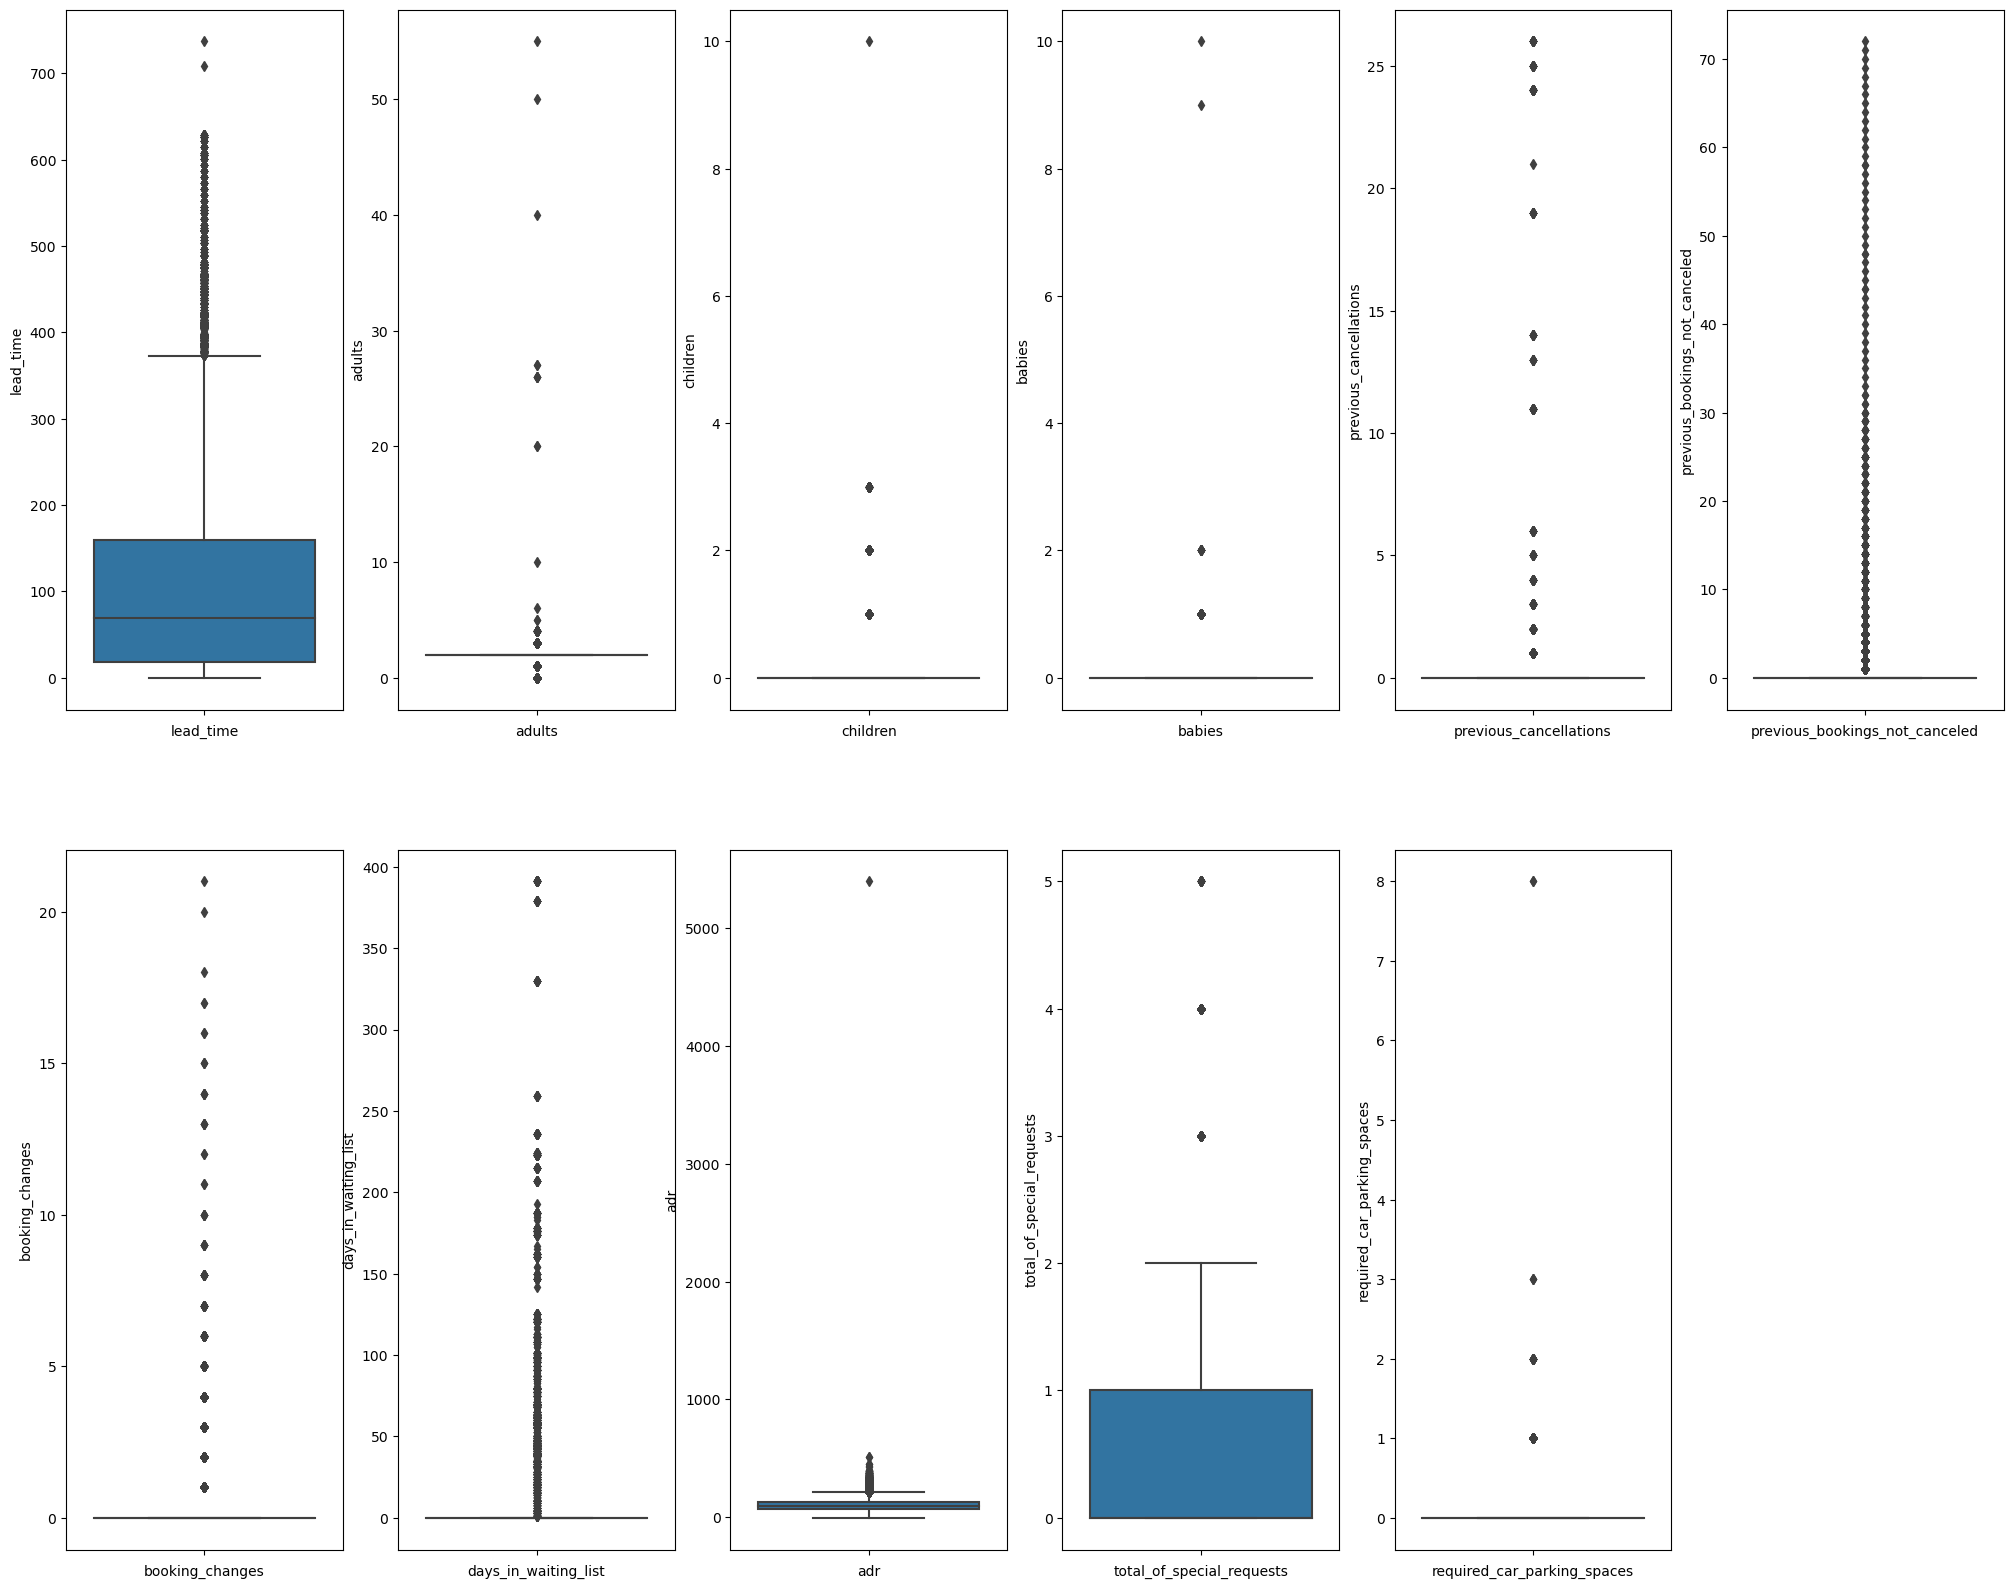

In [20]:
plt.figure(figsize=(25,20))

for i in range(0,len(nums)):
       plt.subplot(2, 6, i+1)
       sns.boxplot(y=df[nums[i]], orient='v')
       plt.xlabel(nums[i])

- Outlier terdapat pada kolom `lead_time`, `adults`, `children`, `babies`, `previous_cancellations`, `previous_bookings_not_canceled`, `booking_changes`, `days_in_waiting_list`, `adr`, `total_of_special_requests` dan `required_car_parking_spaces`.
- Seluruh kolom numerikal mengandung outlier.

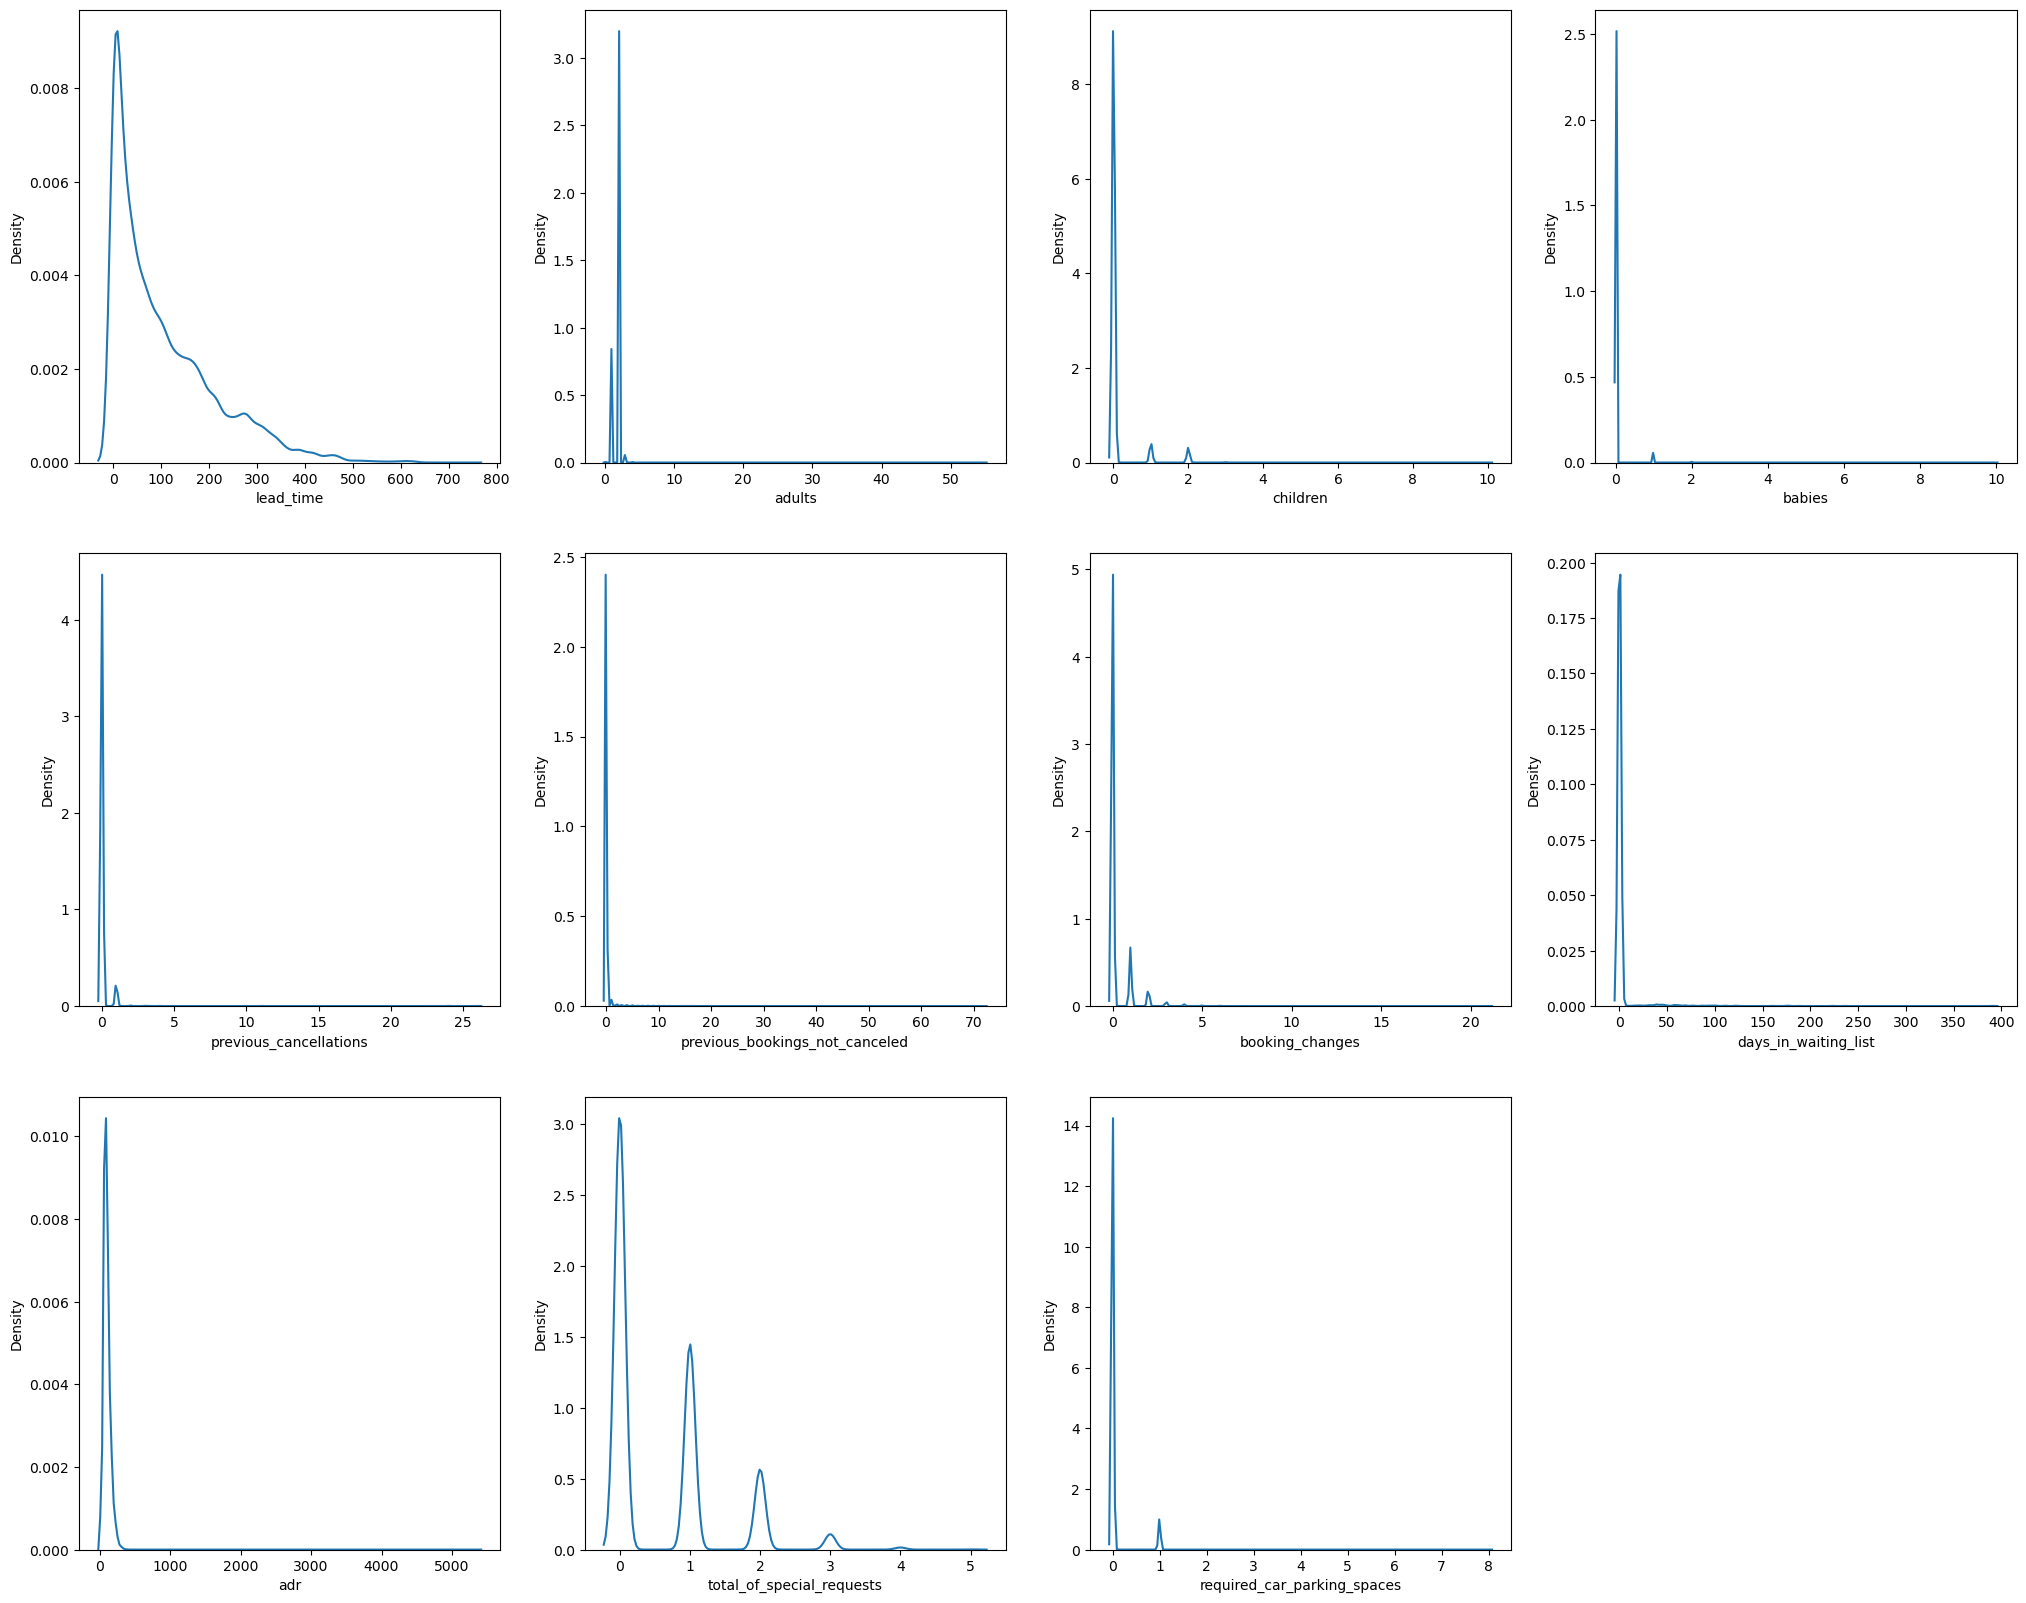

In [21]:
plt.figure(figsize=(25,20))

for i in range(0, len(nums)):
  plt.subplot(3,4,i+1)
  sns.kdeplot(x=df[nums[i]])
  plt.xlabel(nums[i])

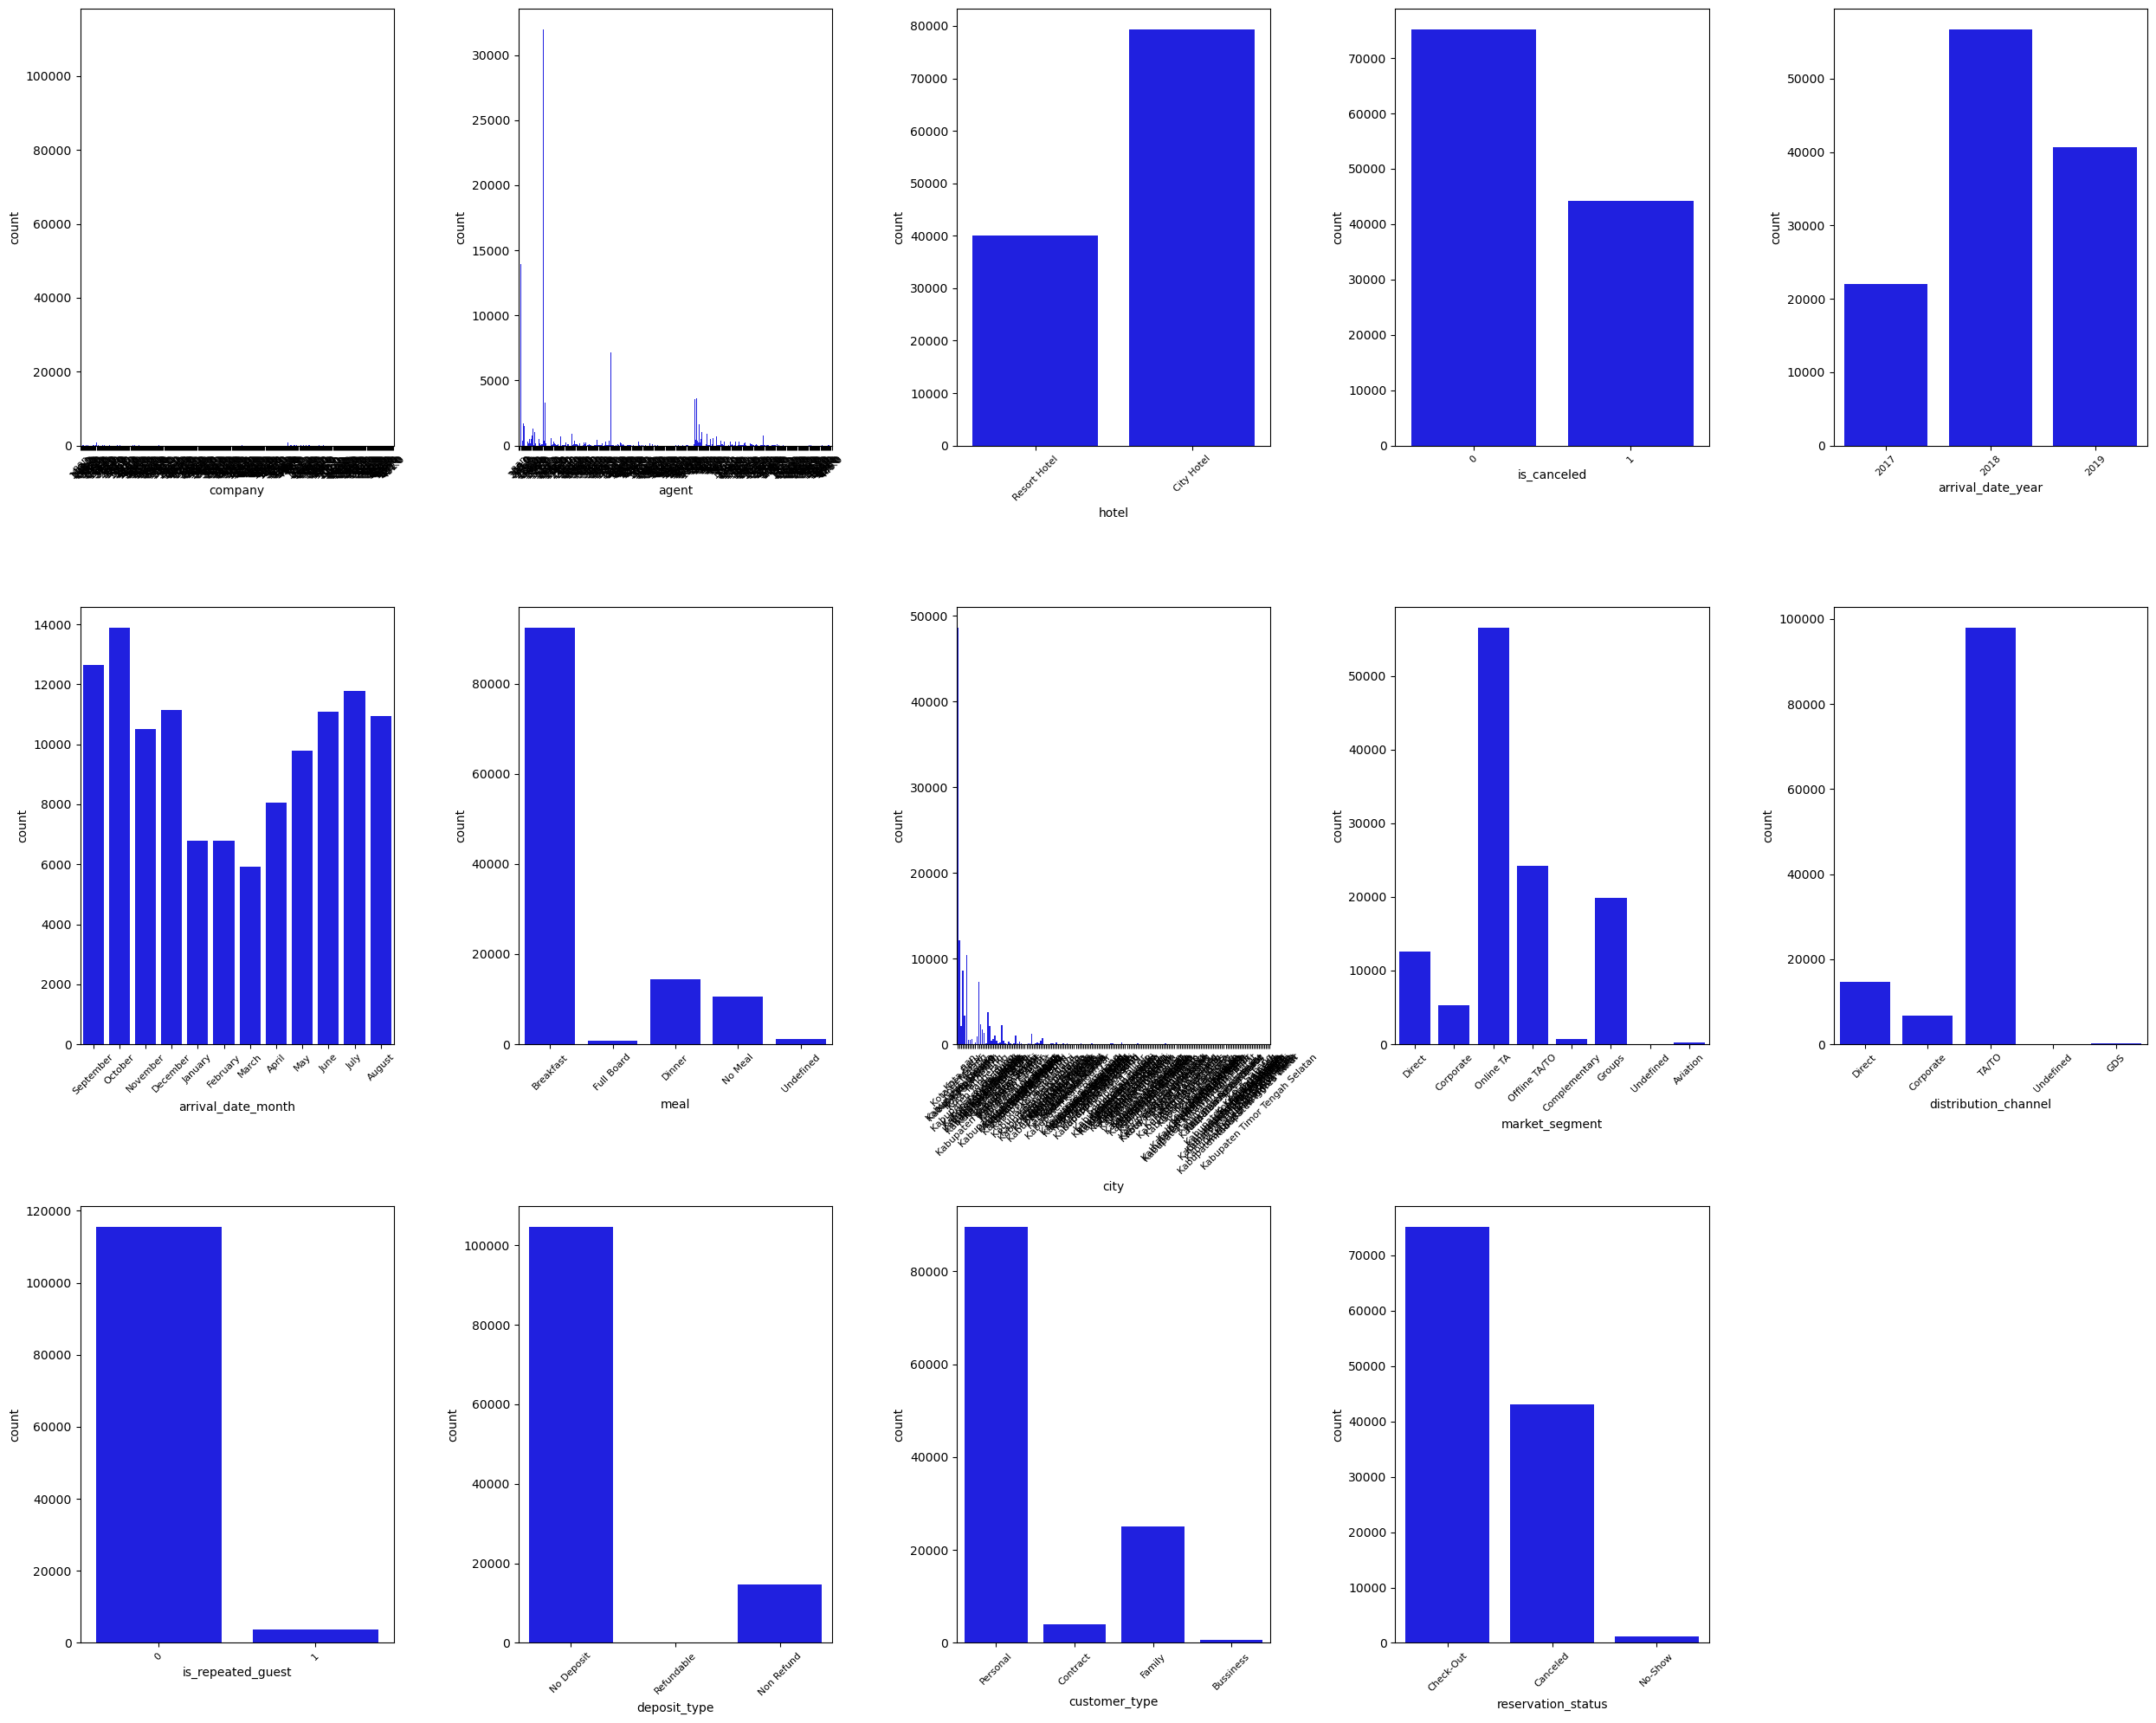

In [22]:
plt.figure(figsize=(25,20))

for i in range(0,len(cats)):
  plt.subplot(3,5,i+1)
  sns.countplot(x=df[cats[i]],color='blue')
  plt.xticks(fontsize=8,rotation=45)
  plt.tight_layout()

## Multivariate Analysis

In [23]:
df.corr()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
lead_time,1.000000,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,0.086042,-0.073548,0.000149,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_week_number,0.126871,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,0.035501,-0.020904,0.005508,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,0.002268,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.027011,-0.000300,0.010613,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,0.085671,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.012775,-0.042715,0.063281,-0.054151,0.049342,-0.018554,0.072671
stays_in_weekdays_nights,0.165799,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.013992,-0.048743,0.096209,-0.002020,0.065237,-0.024859,0.068192
adults,0.119519,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.006738,-0.107983,-0.051673,-0.008283,0.230641,0.014785,0.122884
children,-0.037622,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.024730,-0.021072,0.048949,-0.033273,0.324854,0.056253,0.081745
babies,-0.020915,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.007501,-0.006550,0.083440,-0.010621,0.029186,0.037383,0.097889
previous_cancellations,0.086042,0.035501,-0.027011,-0.012775,-0.013992,-0.006738,-0.024730,-0.007501,1.000000,0.152728,-0.026993,0.005929,-0.065646,-0.018492,-0.048384
previous_bookings_not_canceled,-0.073548,-0.020904,-0.000300,-0.042715,-0.048743,-0.107983,-0.021072,-0.006550,0.152728,1.000000,0.011608,-0.009397,-0.072144,0.047653,0.037824


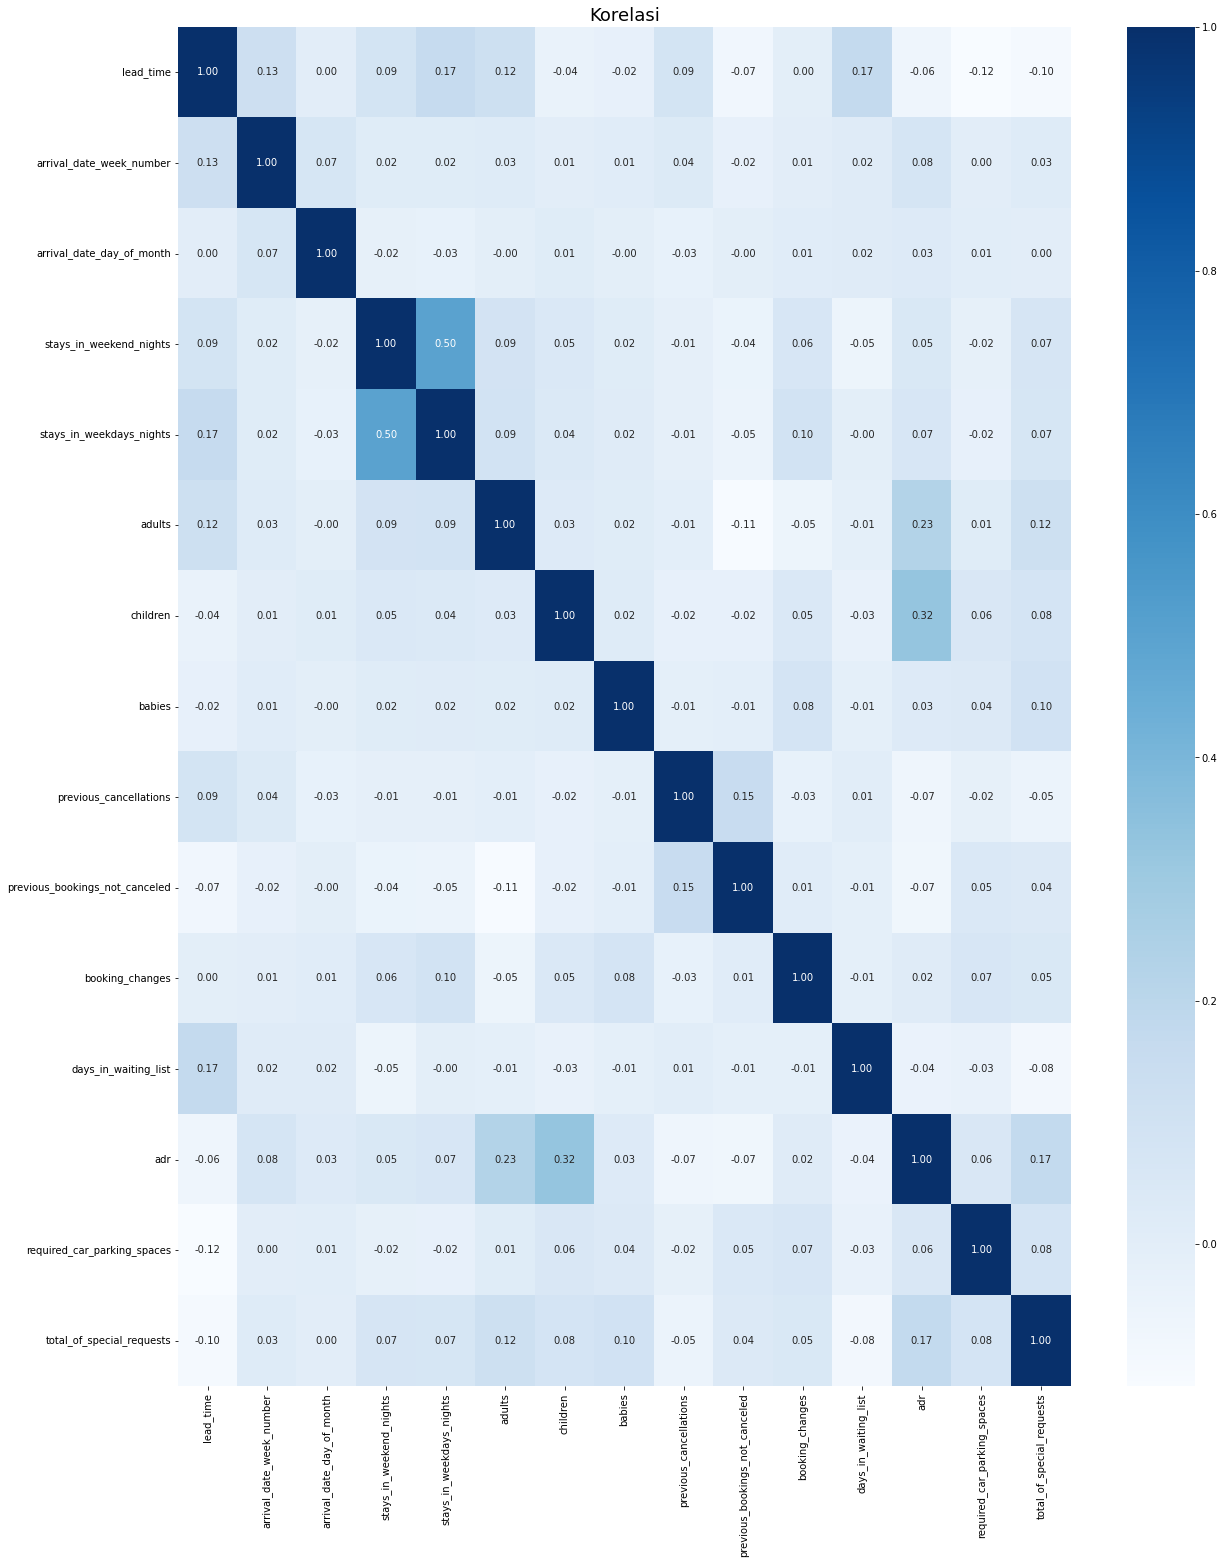

In [23]:
plt.figure(figsize=(20,25))

ax=sns.heatmap(df.corr(),cmap='Blues',annot=True,fmt='.2f')
ax.set_title('Korelasi',fontdict = {'fontsize':18})
plt.show()

Tidak ada kolom yang saling berkorelasi kuat (r > 0.7).

# DATA PRE-PROCESSING

## Data Cleansing

In [24]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Handle Missing Value

In [25]:
df_1.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
city                                 488
children                               4
hotel                                  0
is_repeated_guest                      0
total_of_special_requests              0
required_car_parking_spaces            0
adr                                    0
customer_type                          0
days_in_waiting_list                   0
deposit_type                           0
booking_changes                        0
previous_bookings_not_canceled         0
previous_cancellations                 0
market_segment                         0
distribution_channel                   0
is_canceled                            0
meal                                   0
babies                                 0
adults                                 0
stays_in_weekdays_nights               0
stays_in_weekend_nights                0
arrival_date_day_of_month              0
arrival_date_wee

In [26]:
((df_1.isna().sum())*100/len(df)).sort_values(ascending=False)

company                           94.306893
agent                             13.686238
city                               0.408744
children                           0.003350
hotel                              0.000000
is_repeated_guest                  0.000000
total_of_special_requests          0.000000
required_car_parking_spaces        0.000000
adr                                0.000000
customer_type                      0.000000
days_in_waiting_list               0.000000
deposit_type                       0.000000
booking_changes                    0.000000
previous_bookings_not_canceled     0.000000
previous_cancellations             0.000000
market_segment                     0.000000
distribution_channel               0.000000
is_canceled                        0.000000
meal                               0.000000
babies                             0.000000
adults                             0.000000
stays_in_weekdays_nights           0.000000
stays_in_weekend_nights         

In [27]:
(df_1.loc[:,'company'] == '0.0').value_counts()

False    119390
Name: company, dtype: int64

In [28]:
(df_1.loc[:,'company'] == '0').value_counts()

False    119390
Name: company, dtype: int64

In [29]:
df_1['company'].fillna('0',inplace=True)
df_1['company'].value_counts()                       

0        112593
40.0        927
223.0       784
67.0        267
45.0        250
          ...  
32.0          1
11.0          1
487.0         1
101.0         1
376.0         1
Name: company, Length: 353, dtype: int64

**Karena belum ada value `company` yang 0 atau 0.0, maka nilai null pada kolom tersebut diganti menjadi 0 (artinya booking hotel tidak berasal dari company)**

In [30]:
(df_1.loc[:,'agent'] == '0.0').value_counts()

False    119390
Name: agent, dtype: int64

In [31]:
(df_1.loc[:,'agent'] == '0').value_counts()

False    119390
Name: agent, dtype: int64

In [32]:
df_1['agent'].fillna('0',inplace=True)
df_1['agent'].value_counts()                       

9.0      31961
0        16340
240.0    13922
1.0       7191
14.0      3640
         ...  
280.0        1
285.0        1
289.0        1
265.0        1
497.0        1
Name: agent, Length: 334, dtype: int64

**Karena belum ada value `agent` yang 0 atau 0.0, maka nilai null pada kolom tersebut diganti menjadi 0 (artinya booking hotel tidak berasal dari agent)**

In [33]:
df_1['city'].value_counts()

Kota Denpasar              48590
Kabupaten Bangka           12129
Kota Yogyakarta            10415
Kota Batu                   8568
Kabupaten Bandung           7287
                           ...  
Kabupaten Malang               1
Kabupaten Bekasi               1
Kabupaten Barito Kuala         1
Kota Palembang                 1
Kabupaten Maluku Tengah        1
Name: city, Length: 177, dtype: int64

In [34]:
df_1['city'].fillna('Kota Denpasar',inplace=True)

In [35]:
df_1['city'].value_counts()

Kota Denpasar              49078
Kabupaten Bangka           12129
Kota Yogyakarta            10415
Kota Batu                   8568
Kabupaten Bandung           7287
                           ...  
Kabupaten Malang               1
Kabupaten Bekasi               1
Kabupaten Barito Kuala         1
Kota Palembang                 1
Kabupaten Maluku Tengah        1
Name: city, Length: 177, dtype: int64

**Null pada kolom `city` diisi dengan nilai modenya.**

In [36]:
df_1['children'].fillna(df_1['children'].median(),inplace=True)

**Null pada kolom `city` diisi dengan nilai mediannya karena data children bersifat skew.**

In [37]:
df_1.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

### Duplicated Data

Contoh handling duplicated data (untuk dataset ini tidak dilakukan karena data booking hotel memungkinkan untuk terjadi duplikat/sama).

In [38]:
print('Data yang duplikat = ',df.duplicated().sum())

Data yang duplikat =  33261


In [39]:
df_unique = df_1.drop_duplicates(keep='first')
df_unique

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,0,0,0,Personal,0.00,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,0,0,0,Personal,0.00,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,0,0,0,Personal,75.00,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,0,0,Personal,75.00,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,0,0,Personal,98.00,0,1,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2019,October,35,30,2,5,2,...,0,No Deposit,394.0,0,0,Personal,96.14,0,0,Check-Out
119386,City Hotel,0,102,2019,October,35,31,2,5,3,...,0,No Deposit,9.0,0,0,Personal,225.43,0,2,Check-Out
119387,City Hotel,0,34,2019,October,35,31,2,5,2,...,0,No Deposit,9.0,0,0,Personal,157.71,0,4,Check-Out
119388,City Hotel,0,109,2019,October,35,31,2,5,2,...,0,No Deposit,89.0,0,0,Personal,104.40,0,0,Check-Out


### Outlier Handling

Contoh handling outlier menggunakan z-score dengan anggapan terdistribusi normal (untuk dataset ini tidak akan dilakukan karena data-data outlier tersebut perlu dikeep untuk diobservasi).

In [40]:
from scipy import stats

print(f'Jumlah baris sebelum filter outlier: {len(df_unique)}')

filtered_entries = np.array([True] * len(df_unique))
for col in df_unique[nums]:
  z_scores = np.abs(stats.zscore(df_unique[col]))
  filtered_entries = (z_scores < 3) 

df_out = df_unique[filtered_entries]

print(f'Jumlah baris setelah filter outlier: {len(df_out)}')
print('Outlier yang dihapus sekitar',round((len(df_unique)-len(df_out))/len(df_unique)*100,2), '%')

Jumlah baris sebelum filter outlier: 86108
Jumlah baris setelah filter outlier: 78815
Outlier yang dihapus sekitar 8.47 %


## Changing Unfit/ Inappropiate Value in Data Columns

### Categorical Column

In [41]:
for col in cats:
    print(f'Value count column {col}:')
    print(df_1[col].value_counts())
    print()          

Value count column company:
0        112593
40.0        927
223.0       784
67.0        267
45.0        250
          ...  
32.0          1
11.0          1
487.0         1
101.0         1
376.0         1
Name: company, Length: 353, dtype: int64

Value count column agent:
9.0      31961
0        16340
240.0    13922
1.0       7191
14.0      3640
         ...  
280.0        1
285.0        1
289.0        1
265.0        1
497.0        1
Name: agent, Length: 334, dtype: int64

Value count column hotel:
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

Value count column is_canceled:
0    75166
1    44224
Name: is_canceled, dtype: int64

Value count column arrival_date_year:
2018    56707
2019    40687
2017    21996
Name: arrival_date_year, dtype: int64

Value count column arrival_date_month:
October      13877
September    12661
July         11791
December     11160
June         11089
August       10939
November     10508
May           9794
April         8068
January   

- value 'Undefined' pada kolom `meal` sebaiknya diganti menjadi 'No Meal' (cari aman jika memang tidak tersedia layanan meal).
- value 'Undefined' pada kolom `market_segment` diganti menjadi 'Online TA' (nilai modus)
- value 'Undefined' pada kolom `distribution_channel` diganti menjadi 'TA/TO' (nilai modus)

In [42]:
df_1['meal'].replace('Undefined','No Meal',inplace=True)
df_1['market_segment'].replace('Undefined','Online TA',inplace=True)
df_1['distribution_channel'].replace('Undefined','TA/TO',inplace=True)

In [43]:
for col in cats:
    print(f'Value count column {col}:')
    print(df_1[col].value_counts())
    print()          

Value count column company:
0        112593
40.0        927
223.0       784
67.0        267
45.0        250
          ...  
32.0          1
11.0          1
487.0         1
101.0         1
376.0         1
Name: company, Length: 353, dtype: int64

Value count column agent:
9.0      31961
0        16340
240.0    13922
1.0       7191
14.0      3640
         ...  
280.0        1
285.0        1
289.0        1
265.0        1
497.0        1
Name: agent, Length: 334, dtype: int64

Value count column hotel:
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

Value count column is_canceled:
0    75166
1    44224
Name: is_canceled, dtype: int64

Value count column arrival_date_year:
2018    56707
2019    40687
2017    21996
Name: arrival_date_year, dtype: int64

Value count column arrival_date_month:
October      13877
September    12661
July         11791
December     11160
June         11089
August       10939
November     10508
May           9794
April         8068
January   

### Numerical Column

In [43]:
for col in nums:
    print(f'Value count column {col}:')
    print(df_1[col].value_counts())
    print()          

Value count column lead_time:
0      6345
1      3460
2      2069
3      1816
4      1715
       ... 
400       1
370       1
532       1
371       1
463       1
Name: lead_time, Length: 479, dtype: int64

Value count column adults:
2     89680
1     23027
3      6202
0       403
4        62
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64

Value count column children:
0.0     110800
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

Value count column babies:
0     118473
1        900
2         15
10         1
9          1
Name: babies, dtype: int64

Value count column previous_cancellations:
0     112906
1       6051
2        116
3         65
24        48
11        35
4         31
26        26
25        25
6         22
19        19
5         19
14        14
13        12
21         1
Name: previous_cancellations, dtype: int64

Value count column previous_booking

Cek kolom adults, children dan babies apakah dalam range nilai yang masuk akal.

**Adults**

In [45]:
df_1['adults'].value_counts()

2     89680
1     23027
3      6202
0       403
4        62
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64

In [44]:
df_1[df_1['adults']>=10]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
1539,Resort Hotel,1,304,2017,November,36,3,0,3,40,...,0,No Deposit,0,0,0,Bussiness,0.0,0,0,Canceled
1587,Resort Hotel,1,333,2017,November,36,5,2,5,26,...,0,No Deposit,96.0,0,0,Bussiness,0.0,0,0,Canceled
1643,Resort Hotel,1,336,2017,November,37,7,1,2,50,...,0,No Deposit,0,0,0,Bussiness,0.0,0,0,Canceled
1752,Resort Hotel,1,340,2017,November,37,12,2,5,26,...,0,No Deposit,96.0,0,0,Bussiness,0.0,0,0,Canceled
1884,Resort Hotel,1,347,2017,November,38,19,2,5,26,...,0,No Deposit,96.0,0,0,Bussiness,0.0,0,0,Canceled
1917,Resort Hotel,1,349,2017,November,39,21,1,3,27,...,0,No Deposit,0,0,0,Bussiness,0.0,0,0,Canceled
1962,Resort Hotel,1,352,2017,November,39,24,1,3,27,...,0,No Deposit,0,0,0,Bussiness,0.0,0,0,Canceled
2003,Resort Hotel,1,354,2017,November,39,26,2,5,26,...,0,No Deposit,96.0,0,0,Bussiness,0.0,0,0,Canceled
2164,Resort Hotel,1,361,2017,December,40,3,2,5,26,...,0,No Deposit,96.0,0,0,Bussiness,0.0,0,0,Canceled
2173,Resort Hotel,1,338,2017,December,41,4,2,0,55,...,0,No Deposit,0,0,0,Bussiness,0.0,0,0,Canceled


Data terlihat normal.

**Children**

In [45]:
df_1['children'].value_counts()

0.0     110800
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [46]:
df_1[df_1['children']==10.0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
328,Resort Hotel,1,55,2017,September,29,12,4,10,2,...,2,No Deposit,8.0,0,0,Contract,133.16,0,1,No-Show


In [49]:
df_1[df_1['children']==10.0][nums]

,lead_time,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,total_of_special_requests,required_car_parking_spaces
328,55,2,10.0,0,0,0,2,0,133.16,1,0


In [50]:
df_1.shape

(119390, 29)

In [47]:
df_1 = df_1[df_1['children']<10]
df_1.shape

(119389, 29)

Jumlah children 10 terlalu banyak (adults hanya 2 orang), maka baris tersebut dihapus karena sepertinya ada kesalahan input.

**Babies**

In [48]:
df_1['babies'].value_counts()

0     118472
1        900
2         15
10         1
9          1
Name: babies, dtype: int64

In [49]:
df_1[df_1['babies']>8]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
46619,City Hotel,0,37,2018,March,3,12,0,2,2,...,1,No Deposit,9.0,0,0,Personal,84.45,0,1,Check-Out
78656,City Hotel,0,11,2017,December,42,11,2,1,1,...,1,No Deposit,95.0,0,0,Family,95.00,0,0,Check-Out


In [50]:
(df_1[df_1['babies']>8]).iloc[:,-10:]

,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
46619,1,No Deposit,9.0,0,0,Personal,84.45,0,1,Check-Out
78656,1,No Deposit,95.0,0,0,Family,95.00,0,0,Check-Out


In [55]:
df_1.shape

(119389, 29)

In [51]:
df_1 = df_1[df_1['babies']<9]
df_1.shape

(119387, 29)

Jumlah bayi (9 dan 10) terlalu banyak untuk adults yang hanya berjumlah 2 dan 1 orang.<br>
Kedua kolom tersebut dihapus saja karena sepertinya terdapat kesalahan input.

In [52]:
for col in nums:
    print(f'Value count column {col}:')
    print(df_1[col].value_counts())
    print()          

Value count column lead_time:
0      6345
1      3460
2      2069
3      1816
4      1715
       ... 
400       1
370       1
532       1
371       1
463       1
Name: lead_time, Length: 479, dtype: int64

Value count column adults:
2     89678
1     23026
3      6202
0       403
4        62
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64

Value count column children:
0.0    110798
1.0      4861
2.0      3652
3.0        76
Name: children, dtype: int64

Value count column babies:
0    118472
1       900
2        15
Name: babies, dtype: int64

Value count column previous_cancellations:
0     112903
1       6051
2        116
3         65
24        48
11        35
4         31
26        26
25        25
6         22
19        19
5         19
14        14
13        12
21         1
Name: previous_cancellations, dtype: int64

Value count column previous_bookings_not_canceled:
0     115767
1       1542
2     

# MONTHLY HOTEL BOOKING ANALYSIS

## Monthly Hotel Booking Based on Hotel Type

In [53]:
df_1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,0,0,0,Personal,0.00,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,0,0,0,Personal,0.00,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,0,0,0,Personal,75.00,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,0,0,Personal,75.00,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,0,0,Personal,98.00,0,1,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2019,October,35,30,2,5,2,...,0,No Deposit,394.0,0,0,Personal,96.14,0,0,Check-Out
119386,City Hotel,0,102,2019,October,35,31,2,5,3,...,0,No Deposit,9.0,0,0,Personal,225.43,0,2,Check-Out
119387,City Hotel,0,34,2019,October,35,31,2,5,2,...,0,No Deposit,9.0,0,0,Personal,157.71,0,4,Check-Out
119388,City Hotel,0,109,2019,October,35,31,2,5,2,...,0,No Deposit,89.0,0,0,Personal,104.40,0,0,Check-Out


In [54]:
df_1['arrival_date_year'].unique()

array([2017, 2018, 2019], dtype=int64)

In [55]:
df_total_booking = df_1.groupby(['hotel','arrival_date_month']).agg({'arrival_date_year':['nunique']
                                                                     ,'hotel':['count']}).reset_index()
df_total_booking.columns = ['hotel_type','arrival_month','total_arrival_year','total_booking']
df_total_booking.sort_values('total_arrival_year').reset_index(drop=True)

,hotel_type,arrival_month,total_arrival_year,total_booking
0,City Hotel,April,2,4965
1,Resort Hotel,July,2,3559
2,Resort Hotel,January,2,2437
3,Resort Hotel,February,2,2648
4,Resort Hotel,December,2,3555
5,Resort Hotel,August,2,3045
6,Resort Hotel,April,2,3103
7,Resort Hotel,May,2,3336
8,Resort Hotel,November,2,3108
9,City Hotel,November,2,7400


In [56]:
df_total_booking['total_booking'].sum()

119387

## Data Normalization


Jika dilihat dari data di atas, data untuk bulan September dan Oktober muncul pada 3 tahun berbeda sehingga data harus dinormalisasi dengan mencari nilai **rata-rata** total booking dari setiap data.

In [57]:
df_total_booking['average_total_booking'] = round(df_total_booking['total_booking']/df_total_booking['total_arrival_year'])
df_total_booking

,hotel_type,arrival_month,total_arrival_year,total_booking,average_total_booking
0,City Hotel,April,2,4965,2482.0
1,City Hotel,August,2,7894,3947.0
2,City Hotel,December,2,7604,3802.0
3,City Hotel,February,2,4132,2066.0
4,City Hotel,January,2,4357,2178.0
5,City Hotel,July,2,8232,4116.0
6,City Hotel,June,2,7480,3740.0
7,City Hotel,March,2,3735,1868.0
8,City Hotel,May,2,6458,3229.0
9,City Hotel,November,2,7400,3700.0


## Sort Data by Month

In [58]:
month = ['January','February','March','April','May','June','July','August','September','October','November','December']

df_total_booking['arrival_month'] = pd.Categorical(df_total_booking['arrival_month'],categories=month)
df_total_booking = df_total_booking.sort_values(by=['hotel_type','arrival_month']).reset_index(drop=True)
df_total_booking

,hotel_type,arrival_month,total_arrival_year,total_booking,average_total_booking
0,City Hotel,January,2,4357,2178.0
1,City Hotel,February,2,4132,2066.0
2,City Hotel,March,2,3735,1868.0
3,City Hotel,April,2,4965,2482.0
4,City Hotel,May,2,6458,3229.0
5,City Hotel,June,2,7480,3740.0
6,City Hotel,July,2,8232,4116.0
7,City Hotel,August,2,7894,3947.0
8,City Hotel,September,3,8088,2696.0
9,City Hotel,October,3,8983,2994.0


## Plot to Show Changes in Increase or Decrease of Total Hotel Bookings Every Month Based on Hotel Type


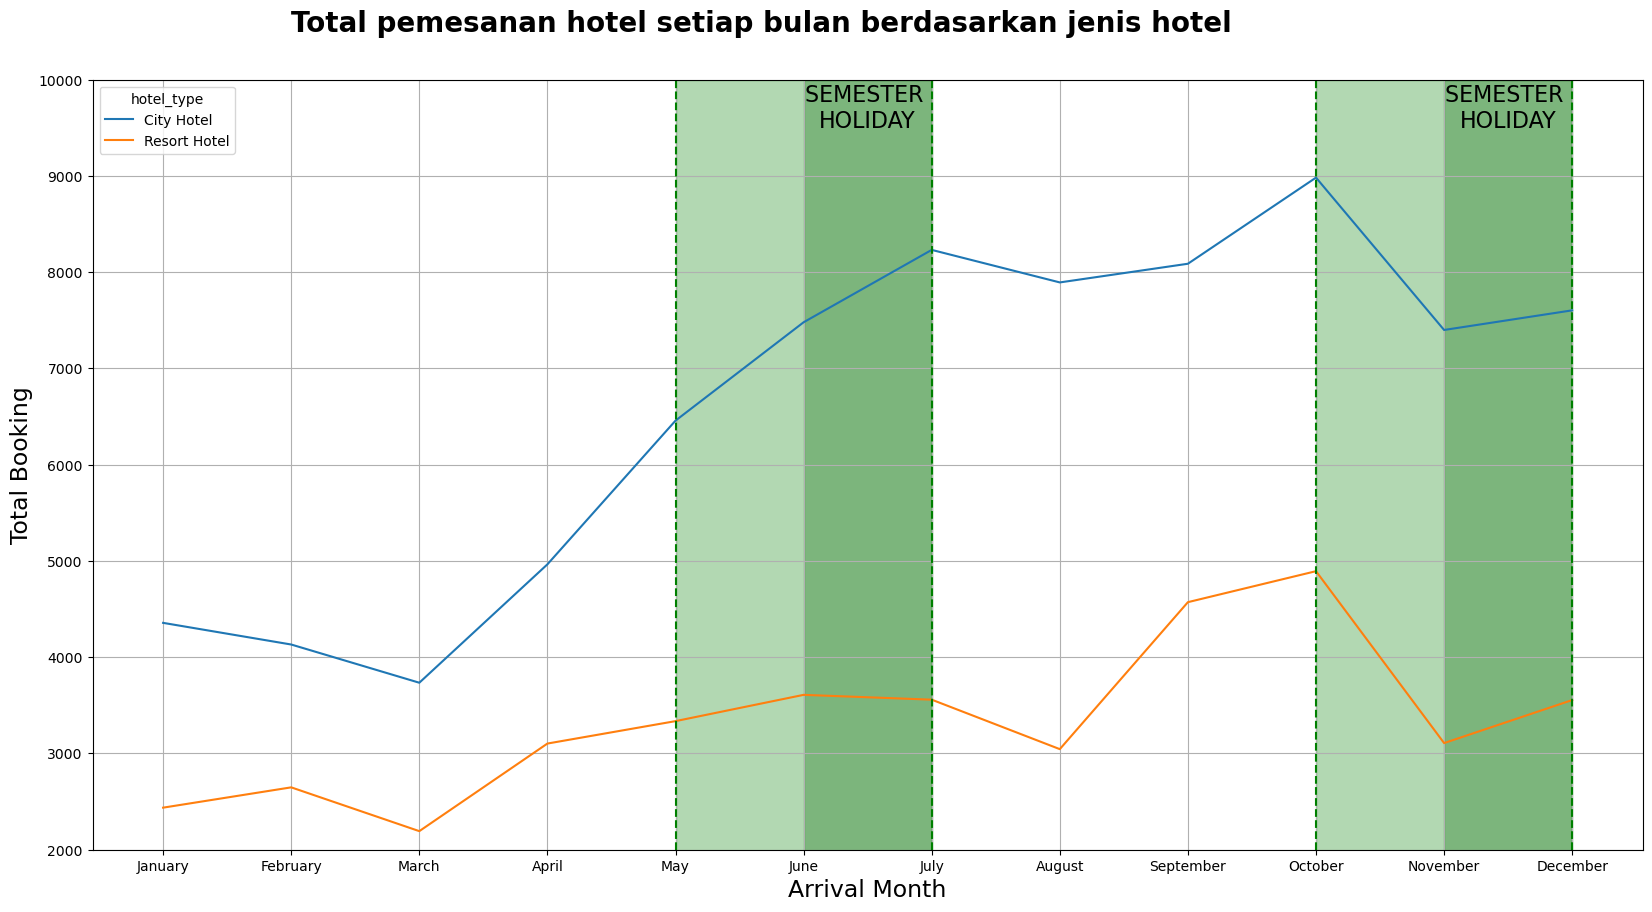

In [68]:
plt.figure(figsize=(20,10))

sns.lineplot(x='arrival_month',y='total_booking',data=df_total_booking,hue='hotel_type')
plt.grid()
plt.xlabel('Arrival Month', fontsize=17)
plt.ylabel('Total Booking',fontsize=17)
plt.ylim(2000,10000)

plt.axvline(x=4,ls='--',color='green') #garis vertikal titik-titik sebagai penanda highlight
plt.axvline(x=6,ls='--',color='green') #garis vertikal titik-titik sebagai penanda highlight
plt.text(x=5.5,y=9500,s='SEMESTER \nHOLIDAY',horizontalalignment='center',fontsize=16) #text
plt.stackplot(np.arange(4,7,1), 10000,color='green',alpha=0.3) #higlight block kuning
plt.stackplot(np.arange(5,7,1), 10000,color='darkgreen',alpha=0.3) #hightlight block semester holiday

plt.axvline(x=9,ls='--',color='green') #garis vertikal titik-titik sebagai penanda highlight
plt.axvline(x=11,ls='--',color='green') #garis vertikal titik-titik sebagai penanda highlight
plt.text(x=10.5,y=9500,s='SEMESTER \nHOLIDAY',horizontalalignment='center',fontsize=16) #text
plt.stackplot(np.arange(9,12,1), 10000,color='green',alpha=0.3) #higlight block kuning
plt.stackplot(np.arange(10,12,1), 10000,color='darkgreen',alpha=0.3) #hightlight block semester holiday

plt.text(x=1,y=10500,s='Total pemesanan hotel setiap bulan berdasarkan jenis hotel',fontsize=20,fontweight='bold')

plt.show()

##### insight
- Pada Bulan 10 (Oktober) adalah bulan dengan pemesanan tertinggi sebesar 8983 Pemesanan City Hotel dan 4894 Pemesanan Resort Hotel yang terkonfirmasi .
- Pada Bulan 3 (Maret) adalah bulan dengan pemesanan terendah sebesar 3735 pesanan City Hotel dan 2193 pesanan Resort Hotel yang tekonfirmasi
- Pada periode Januari hingga Maret adalah periode terendah yang melakukan pemesanan hotel baik city hotel maupun resort hotel
- Pada periode libur semester awal (mei hingga juli) terjadi peningkatan pemesanan yang mungkin disebabkan oleh libur anak sekolah dan hari raya idul fitri baik untuk city hotel dan resort hotel bagi yang ingin libur bersama keluarga dan mulai ada kegiatan fullboardmeeting  untuk city hotel.
- Pada periode juli hingga oktober  adalah periode banyaknya kegiatan fullboard meeting di city hotel, sedangkan untuk resort hotel memiliki kenaikan karena biasanya pada pertengahan bulan ini banyak pernikahan yang membutuhkan resort hotel untuk honeymoon. Oleh sebab itu memiliki kenaikan signifikan dari awal tahun
- Pada periode libur semester akhir tahun terjadi peningkatan tertinggi baik di city hotel, karena padatnya kunjungan perjalanan dinas baik pemerintahan ataupun swasta dan kegiatan – kegiatan fullboard meeting serta masa libur sekolah, natal dan libur tahun baru . Dan juga untuk resort hotel  menunjukkan kenaikan karena masa libur sekolah, natal dan libur tahun baru .

# ANALYSIS OF STAY DURATION ON HOTEL BOOKINGS CANCELLATION RATES

## Stay Duration

In [69]:
df_1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,0,0,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,0,0,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,0,0,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,0,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,0,0,Personal,98.0,0,1,Check-Out


In [70]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119387 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119387 non-null  object 
 1   is_canceled                     119387 non-null  int64  
 2   lead_time                       119387 non-null  int64  
 3   arrival_date_year               119387 non-null  int64  
 4   arrival_date_month              119387 non-null  object 
 5   arrival_date_week_number        119387 non-null  int64  
 6   arrival_date_day_of_month       119387 non-null  int64  
 7   stays_in_weekend_nights         119387 non-null  int64  
 8   stays_in_weekdays_nights        119387 non-null  int64  
 9   adults                          119387 non-null  int64  
 10  children                        119387 non-null  float64
 11  babies                          119387 non-null  int64  
 12  meal            

In [71]:
df_1['is_canceled'].unique()

array([0, 1], dtype=int64)

In [72]:
df_1['total_nights_stays']=(df_1['stays_in_weekdays_nights'])+(df_1['stays_in_weekend_nights'])
df_1['total_nights_stays'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7, 14, 15, 10, 11,  8,  9, 21, 13, 12,
       18, 46, 28, 17, 19, 22, 23, 16, 29, 42, 20, 26, 33, 30, 56, 25, 27,
       60, 69, 35, 45, 38, 24, 48, 49, 57, 34, 43], dtype=int64)

## Checking Distribution of Stay Duration

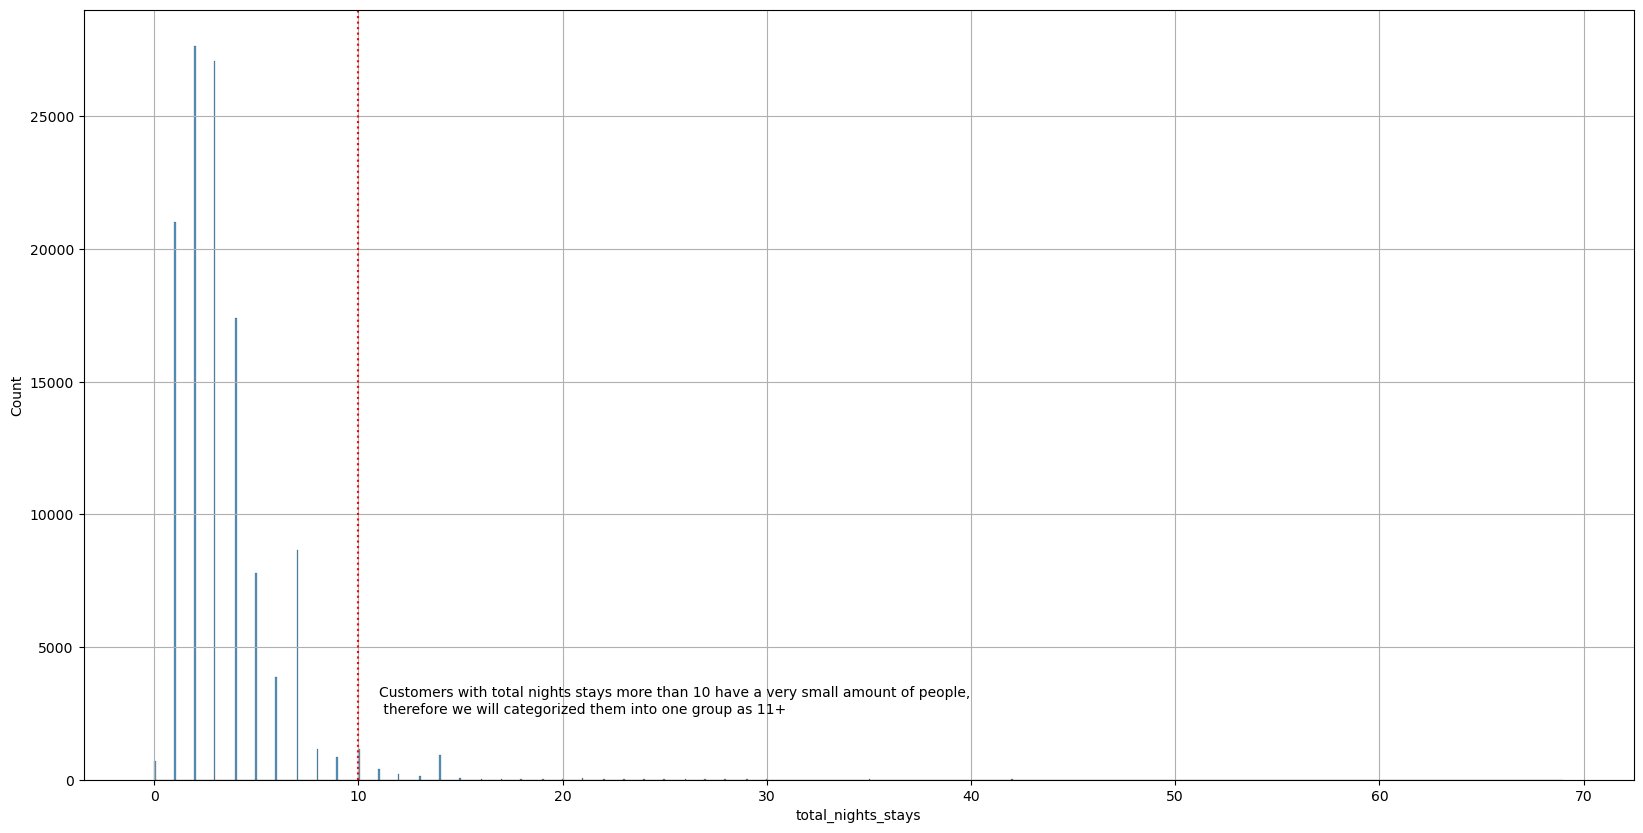

In [74]:
plt.figure(figsize=(20,10))

sns.histplot(x='total_nights_stays',data=df_1)
plt.grid()

plt.axvline(x=10,ls=':',color='red') #garis vertikal titik-titik sebagai penanda highlight
plt.text(x=11,y=2500,s='Customers with total nights stays more than 10 have a very small amount of people,\n therefore we will categorized them into one group as 11+',horizontalalignment='left',fontsize=10) #text

plt.show()

Dikarenakan durasi menginap kebanyakan berada di interval di bawah 10 malam, maka untuk customer yang  menginap di atas 10 malam akan dikelompokkan menjadi satu kelompok saja yaitu 11+ malam.

In [75]:
df_1['total_nights_stays'] = np.where(df_1['total_nights_stays']>10, 11, df_1['total_nights_stays']) #to simplified, we will just state total nights stays more than 10 nights as 11 nights

## Grouping by Total Night Stays and Hotel Type

In [76]:
df_total_nights = df_1.groupby(['hotel','total_nights_stays','is_canceled']).agg({'is_canceled': ['count']}).reset_index()
df_total_nights.columns = ['hotel_type','total_nights_stays','is_canceled','total']
df_total_nights.sort_values('total_nights_stays').reset_index(drop=True)

,hotel_type,total_nights_stays,is_canceled,total
0,City Hotel,0,0,308
1,Resort Hotel,0,1,12
2,Resort Hotel,0,0,372
3,City Hotel,0,1,23
4,City Hotel,1,1,4103
5,Resort Hotel,1,0,6580
6,Resort Hotel,1,1,1168
7,City Hotel,1,0,9169
8,City Hotel,2,0,10991
9,City Hotel,2,1,10434


In [77]:
df_total_nights['total'].sum()

119387

In [78]:
df_pivot = df_total_nights.pivot_table(index=['hotel_type','total_nights_stays'],columns='is_canceled',values='total').reset_index()
df_pivot

is_canceled,hotel_type,total_nights_stays,0,1
0,City Hotel,0,308,23
1,City Hotel,1,9169,4103
2,City Hotel,2,10991,10434
3,City Hotel,3,11894,9486
4,City Hotel,4,7704,4853
5,City Hotel,5,3221,1776
6,City Hotel,6,1116,943
7,City Hotel,7,1251,808
8,City Hotel,8,209,176
9,City Hotel,9,120,93


In [79]:
df_pivot['percentage_cancel'] = round(df_pivot[1]*100/(df_pivot[1]+df_pivot[0]),2)
df_pivot

is_canceled,hotel_type,total_nights_stays,0,1,percentage_cancel
0,City Hotel,0,308,23,6.95
1,City Hotel,1,9169,4103,30.91
2,City Hotel,2,10991,10434,48.70
3,City Hotel,3,11894,9486,44.37
4,City Hotel,4,7704,4853,38.65
5,City Hotel,5,3221,1776,35.54
6,City Hotel,6,1116,943,45.80
7,City Hotel,7,1251,808,39.24
8,City Hotel,8,209,176,45.71
9,City Hotel,9,120,93,43.66


In [80]:
df_pivot

is_canceled,hotel_type,total_nights_stays,0,1,percentage_cancel
0,City Hotel,0,308,23,6.95
1,City Hotel,1,9169,4103,30.91
2,City Hotel,2,10991,10434,48.70
3,City Hotel,3,11894,9486,44.37
4,City Hotel,4,7704,4853,38.65
5,City Hotel,5,3221,1776,35.54
6,City Hotel,6,1116,943,45.80
7,City Hotel,7,1251,808,39.24
8,City Hotel,8,209,176,45.71
9,City Hotel,9,120,93,43.66


## Plot to Show Impact of Stay Duration on Hotel Bookings Cancellation Rates

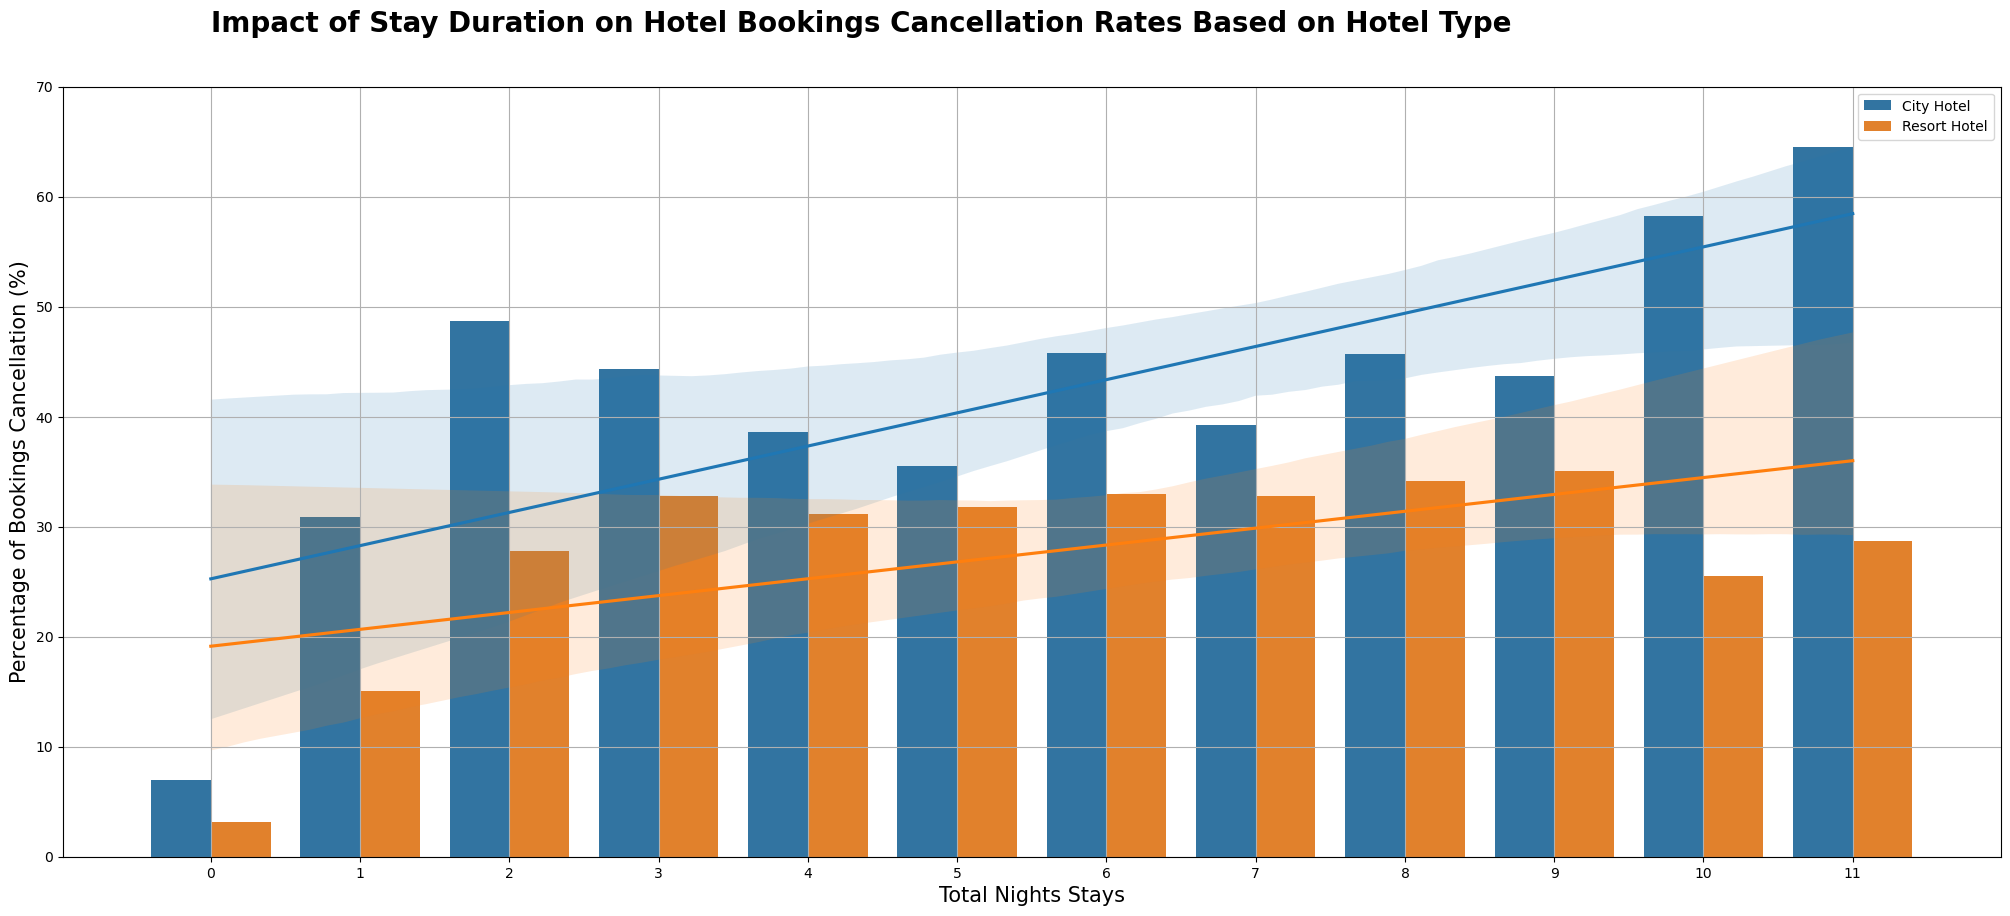

In [82]:
plt.figure(figsize=(25,10))

sns.barplot(x='total_nights_stays',y='percentage_cancel',data=df_pivot,hue='hotel_type')
sns.regplot(x='total_nights_stays',y='percentage_cancel',data=df_pivot[df_pivot['hotel_type']=='City Hotel'], scatter=False)
sns.regplot(x='total_nights_stays',y='percentage_cancel',data=df_pivot[df_pivot['hotel_type']=='Resort Hotel'], scatter=False)
plt.xlabel('Total Nights Stays',fontsize=15)
plt.ylabel('Percentage of Bookings Cancellation (%)',fontsize=15)
plt.legend(loc='upper right')
plt.ylim(0,70)

plt.text(x=0,y=75,s='Impact of Stay Duration on Hotel Bookings Cancellation Rates Based on Hotel Type',fontsize=20,fontweight='bold')

plt.grid()
plt.show()

##### Insight
Secara garis besar, baik pada City Hotel dan Resort Hotel, terlihat tren naiknya persentase cancel booking seiring bertambahnya jumlah hari menginap dari customer. Hal ini dapat menyebabkan ruginya perusahaan (hotel) karena kamar yang telah dipesan oleh customer bersangkutan ternyata dicancel yang menyebabkan hilangnya potensi revenue.
##### Business Recommendations 
Mengubah metode pembayaran yang dimana customer membayar saat tiba di hotel menjadi pembayaran saat pemesanan, jika terjadi pembatalan dibuat kebijakan pengembalian dana customers (refund) dengan mencantumkan ketentuan fees for canceling orders (biaya pembatalan) berdasarkan hari sebelum kedatangan.

# ANALYSIS OF LEAD TIME ON HOTEL BOOKINGS CANCELLATION RATE

## Lead Time

In [77]:
df_1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_nights_stays
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,No Deposit,0,0,0,Personal,0.0,0,0,Check-Out,0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,No Deposit,0,0,0,Personal,0.0,0,0,Check-Out,0
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,No Deposit,0,0,0,Personal,75.0,0,0,Check-Out,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,No Deposit,304.0,0,0,Personal,75.0,0,0,Check-Out,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,No Deposit,240.0,0,0,Personal,98.0,0,1,Check-Out,2


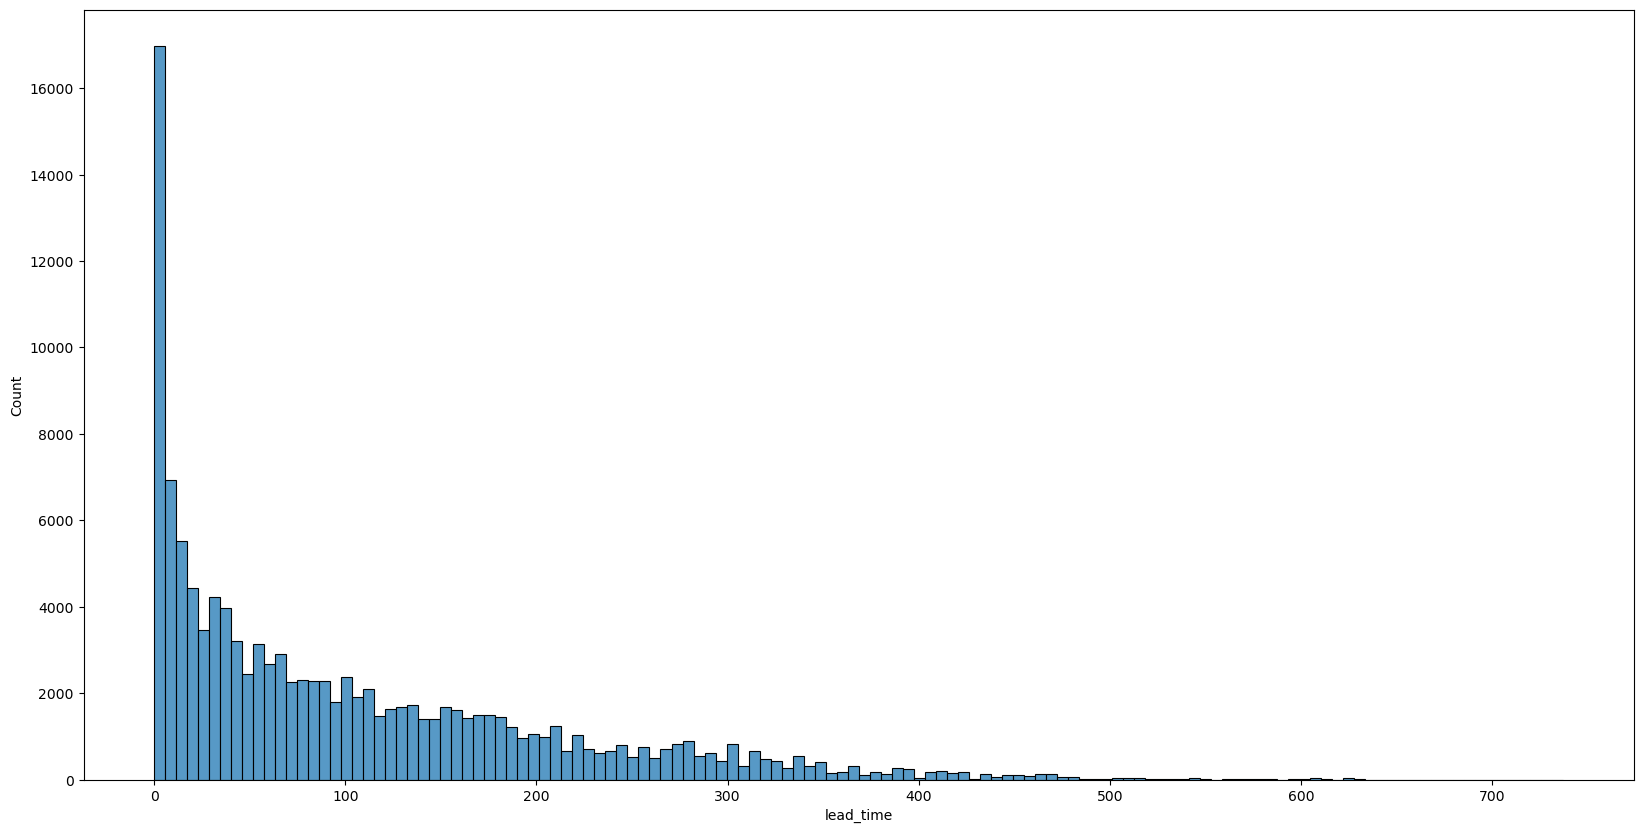

In [83]:
plt.figure(figsize=(20,10))

sns.histplot(x='lead_time',data=df_1)

plt.show()

Data Lead Time akan dikelompokkan menjadi per 30 hari (perbandingan per bulan).

In [86]:
max(df_1['lead_time'])

737

In [87]:
bins = np.arange(0,max(df_1['lead_time']+30),30) 
labels = ["{0}-{1}".format(str(bins[x]),str(bins[x+1])) for x in range (0,len(bins)-1)]

df_1['lead_time_group']=pd.cut(df_1['lead_time'],bins=bins,labels=labels,include_lowest=True)
df_1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_nights_stays,lead_time_group
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,0,0,0,Personal,0.00,0,0,Check-Out,0,330-360
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,0,0,0,Personal,0.00,0,0,Check-Out,0,720-750
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,0,0,Personal,75.00,0,0,Check-Out,1,0-30
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,304.0,0,0,Personal,75.00,0,0,Check-Out,1,0-30
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,240.0,0,0,Personal,98.00,0,1,Check-Out,2,0-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2019,October,35,30,2,5,2,...,394.0,0,0,Personal,96.14,0,0,Check-Out,7,0-30
119386,City Hotel,0,102,2019,October,35,31,2,5,3,...,9.0,0,0,Personal,225.43,0,2,Check-Out,7,90-120
119387,City Hotel,0,34,2019,October,35,31,2,5,2,...,9.0,0,0,Personal,157.71,0,4,Check-Out,7,30-60
119388,City Hotel,0,109,2019,October,35,31,2,5,2,...,89.0,0,0,Personal,104.40,0,0,Check-Out,7,90-120


In [88]:
df_1['lead_time_group'].isnull().sum() # cek apakah terdapat nilai null (biasanya terjadi pada batas bawah/atas dari range pengelompokkan)

0

## Grouping by Lead Time and Based on Hotel Type

In [89]:
df_group = df_1.groupby(['hotel','lead_time_group','is_canceled']).agg({'is_canceled':['count']}).reset_index()
df_group.columns = ['hotel_type','lead_time_group','is_canceled','total']
df_group

,hotel_type,lead_time_group,is_canceled,total
0,City Hotel,0-30,0,18162
1,City Hotel,0-30,1,5199
2,City Hotel,30-60,0,7280
3,City Hotel,30-60,1,4608
4,City Hotel,60-90,0,5216
...,...,...,...,...
95,Resort Hotel,660-690,1,0
96,Resort Hotel,690-720,0,1
97,Resort Hotel,690-720,1,0
98,Resort Hotel,720-750,0,1


In [90]:
df_group['total'].sum()

119387

In [91]:
df_pivot = df_group.pivot_table(index=['hotel_type','lead_time_group'],columns='is_canceled',values='total').reset_index()
df_pivot

is_canceled,hotel_type,lead_time_group,0,1
0,City Hotel,0-30,18162,5199
1,City Hotel,30-60,7280,4608
2,City Hotel,60-90,5216,3692
3,City Hotel,90-120,3961,3486
4,City Hotel,120-150,3070,2543
5,City Hotel,150-180,2446,2717
6,City Hotel,180-210,1801,1793
7,City Hotel,210-240,1225,1280
8,City Hotel,240-270,882,1242
9,City Hotel,270-300,660,1859


In [92]:
df_pivot['percentage_canceled']=round(df_pivot[1]*100/(df_pivot[0]+df_pivot[1]),2)
df_pivot['percentage_canceled'].fillna(0,inplace=True) #mengisi nilai null karena operasi matematika

df_pivot

is_canceled,hotel_type,lead_time_group,0,1,percentage_canceled
0,City Hotel,0-30,18162,5199,22.26
1,City Hotel,30-60,7280,4608,38.76
2,City Hotel,60-90,5216,3692,41.45
3,City Hotel,90-120,3961,3486,46.81
4,City Hotel,120-150,3070,2543,45.31
5,City Hotel,150-180,2446,2717,52.62
6,City Hotel,180-210,1801,1793,49.89
7,City Hotel,210-240,1225,1280,51.10
8,City Hotel,240-270,882,1242,58.47
9,City Hotel,270-300,660,1859,73.80


## Plot to Show Impact of Lead Time on Hotel Bookings Cancellation Rate

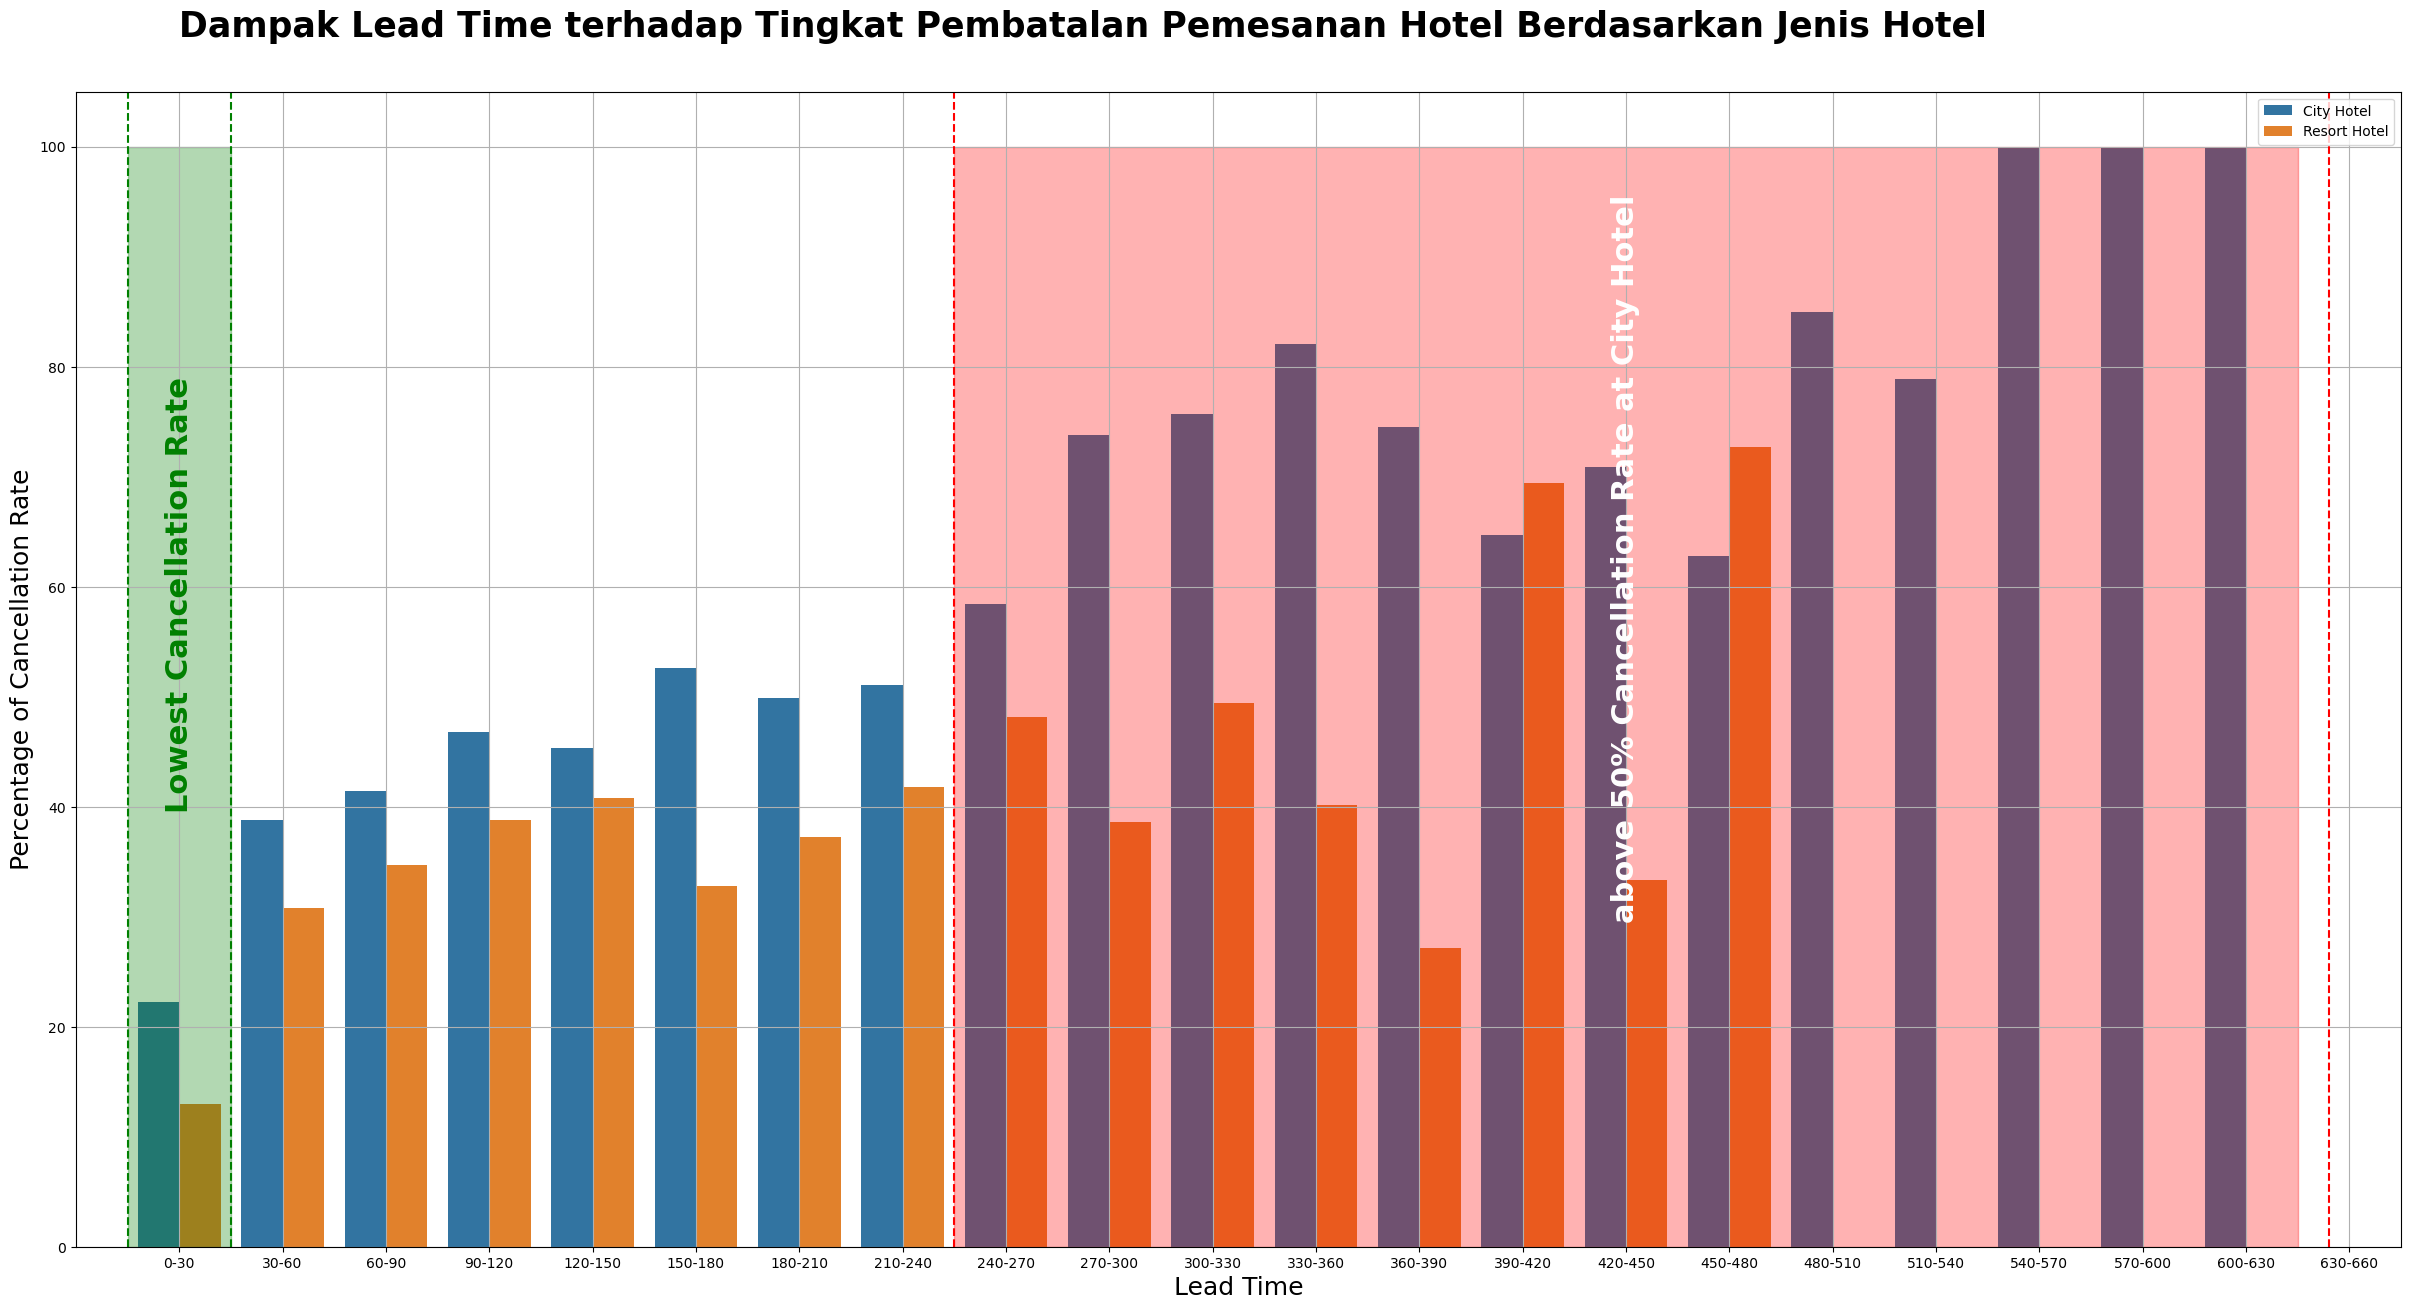

In [111]:
plt.figure(figsize=(30,15))

sns.barplot(x='lead_time_group',y='percentage_canceled',data=df_pivot,hue='hotel_type')

plt.axvline(x=-0.5,ls='--',color='green')
plt.axvline(x=0.5,ls='--',color='green')
plt.stackplot(np.arange(-0.5,1,0.5),100,color='green',alpha=0.3)
plt.text(x=0,y=40,s='Lowest Cancellation Rate',color='green',fontsize=22,fontweight='bold',rotation='vertical',horizontalalignment='center')

plt.axvline(x=7.5,ls='--',color='red')
plt.axvline(x=20.8,ls='--',color='red')
plt.stackplot(np.arange(7.5,20.8,0.5),100,color='red',alpha=0.3)
plt.text(x=14,y=30,s='above 50% Cancellation Rate at City Hotel',color='white',fontsize=22,fontweight='bold',rotation='vertical',horizontalalignment='center')

plt.text(x=0,y=110,s='Dampak Lead Time terhadap Tingkat Pembatalan Pemesanan Hotel Berdasarkan Jenis Hotel',fontsize=25,fontweight='bold')
plt.legend(loc='upper right')
plt.xlim(-1,21.5)
plt.xlabel('Lead Time',fontsize=18)
plt.ylabel('Percentage of Cancellation Rate',fontsize=18)
plt.grid()
plt.show()

##### Insight
- Persentase cancellation rate paling sedikit terdapat pada Lead Time kurang dari 1 bulan

- Persentase cancellation rate pada leadtime 240 hingga 630 sudah menyentuh angka diatas 50%, yang artinya kemungkinan akan pesanan dilanjutkan menjadi kedatangan adalah 50:50, customer hanya melakukan pemesanan untuk mendapatkan slot tempat , sedangkan jadi tidaknya menjadi kedatangan masih melihat perkembangan situasi dan kondisi costumers itu sendiri.

- Terlebih pada rentang lead time 540 hingga 630 tingkat pembatalan adalah 100%, yang artinya customers hanya sampai proses pemesanan saja.

##### Business Recommendations 
Mengubah metode pembayaran yang dimana customer membayar saat tiba di hotel menjadi pembayaran saat pemesanan, jika terjadi pembatalan dibuat kebijakan pengembalian dana customers (refund) dengan mencantumkan ketentuan fees for canceling orders (biaya pembatalan) berdasarkan hari sebelum kedatangan.
